### Fetal Health Classification Using Cardiotocogram (CTG) Data

* **Problem Objective**: Monitoring fetal health using CTG data to classify fetal health status.

* **Problem Definition**:
    1. Can we accurately classify fetal health using CTG data?
    2. Which ML algorithms perform best for this task?
    3. What are the most important features for prediction?

* **Data Source**: Dataset publicly available on Kaggle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle


**On This Dataset**

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

1. Normal
1. Suspect
1. Pathological

**Features**

* **'baseline value'** FHR baseline (beats per minute)
* **'accelerations'** Number of accelerations per second
* **'fetal_movement'** Number of fetal movements per second
* **'uterine_contractions'** Number of uterine contractions per second
* **'light_decelerations'** Number of light decelerations per second
* **'severe_decelerations'** Number of severe decelerations per second
* **'prolongued_decelerations'** Number of prolonged decelerations per second
* **'abnormal_short_term_variability'** Percentage of time with abnormal short term variability
* **'mean_value_of_short_term_variability'** Mean value of short term variability
* **'percentage_of_time_with_abnormal_long_term_variability'** Percentage of time with abnormal long term variability
* **'mean_value_of_long_term_variability'** Mean value of long term variability
* **'histogram_width'** Width of FHR histogram
* **'histogram_min' Minimum** (low frequency) of FHR histogram
* **'histogram_max' Maximum** (high frequency) of FHR histogram
* **'histogram_number_of_peaks'** Number of histogram peaks
* **'histogram_number_of_zeroes'** Number of histogram zeros
* **'histogram_mode'** Histogram mode
* **'histogram_mean'** Histogram mean
* **'histogram_median'** Histogram median
* **'histogram_variance'** Histogram variance
* **'histogram_tendency'** Histogram tendency

* **Target**
* **'fetal_health'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

### M2 Data Collection and Processing

**Data Overview**:
* Records: 2126
* Features: 22 extracted from CTG exams.
* Target: Categorical (Normal, Suspect, Pathological).

**Data Statistics**:
* Missing Values: None detected.
* Normalization/Standardization: Necessary due to varying scales of features.
* All input and output variables are floats, although the target variable is categorical in nature

In [2]:
# Load the dataset
file_path = 'fetal_health.csv'
fetal_health_df = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
fetal_health_df.head()

First few rows of the dataset:


baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [4]:
# check the shape of dataframe
fetal_health_df.shape

(2126, 22)

The dataset consists of **2126** **records** and **22 features**.

In [5]:
# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
fetal_health_df.describe().T


Summary statistics of the dataset:


count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

In [6]:
# Display information about the dataset
print("\nInformation about the dataset:")
fetal_health_df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_v

In [7]:
# Check for missing values
print("\nMissing values in the dataset:")
print(fetal_health_df.isnull().sum())


Missing values in the dataset:
baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogra

### M3 Data Exploration & Visualization

1. **Histogram to view Distributions of features**
2. **Bar chart to show Distribution of Target**
3. **Box plots to reveal outliers in features**
4. **Violin plots reveal distribution patterns**
5. **Correlation matrix in heatmap**
6. **Drop highly correlated features based on correlation matrix**


1. **Histogram to view Distributions of features**:
* Many features (accelerations, fetal movement, uterine contractions) are highly skewed with most values near zero.
* Baseline value approximates a normal distribution.
* Abnormal short-term variability and mean short-term variability have broader distributions.


<Figure size 2500x2000 with 0 Axes>

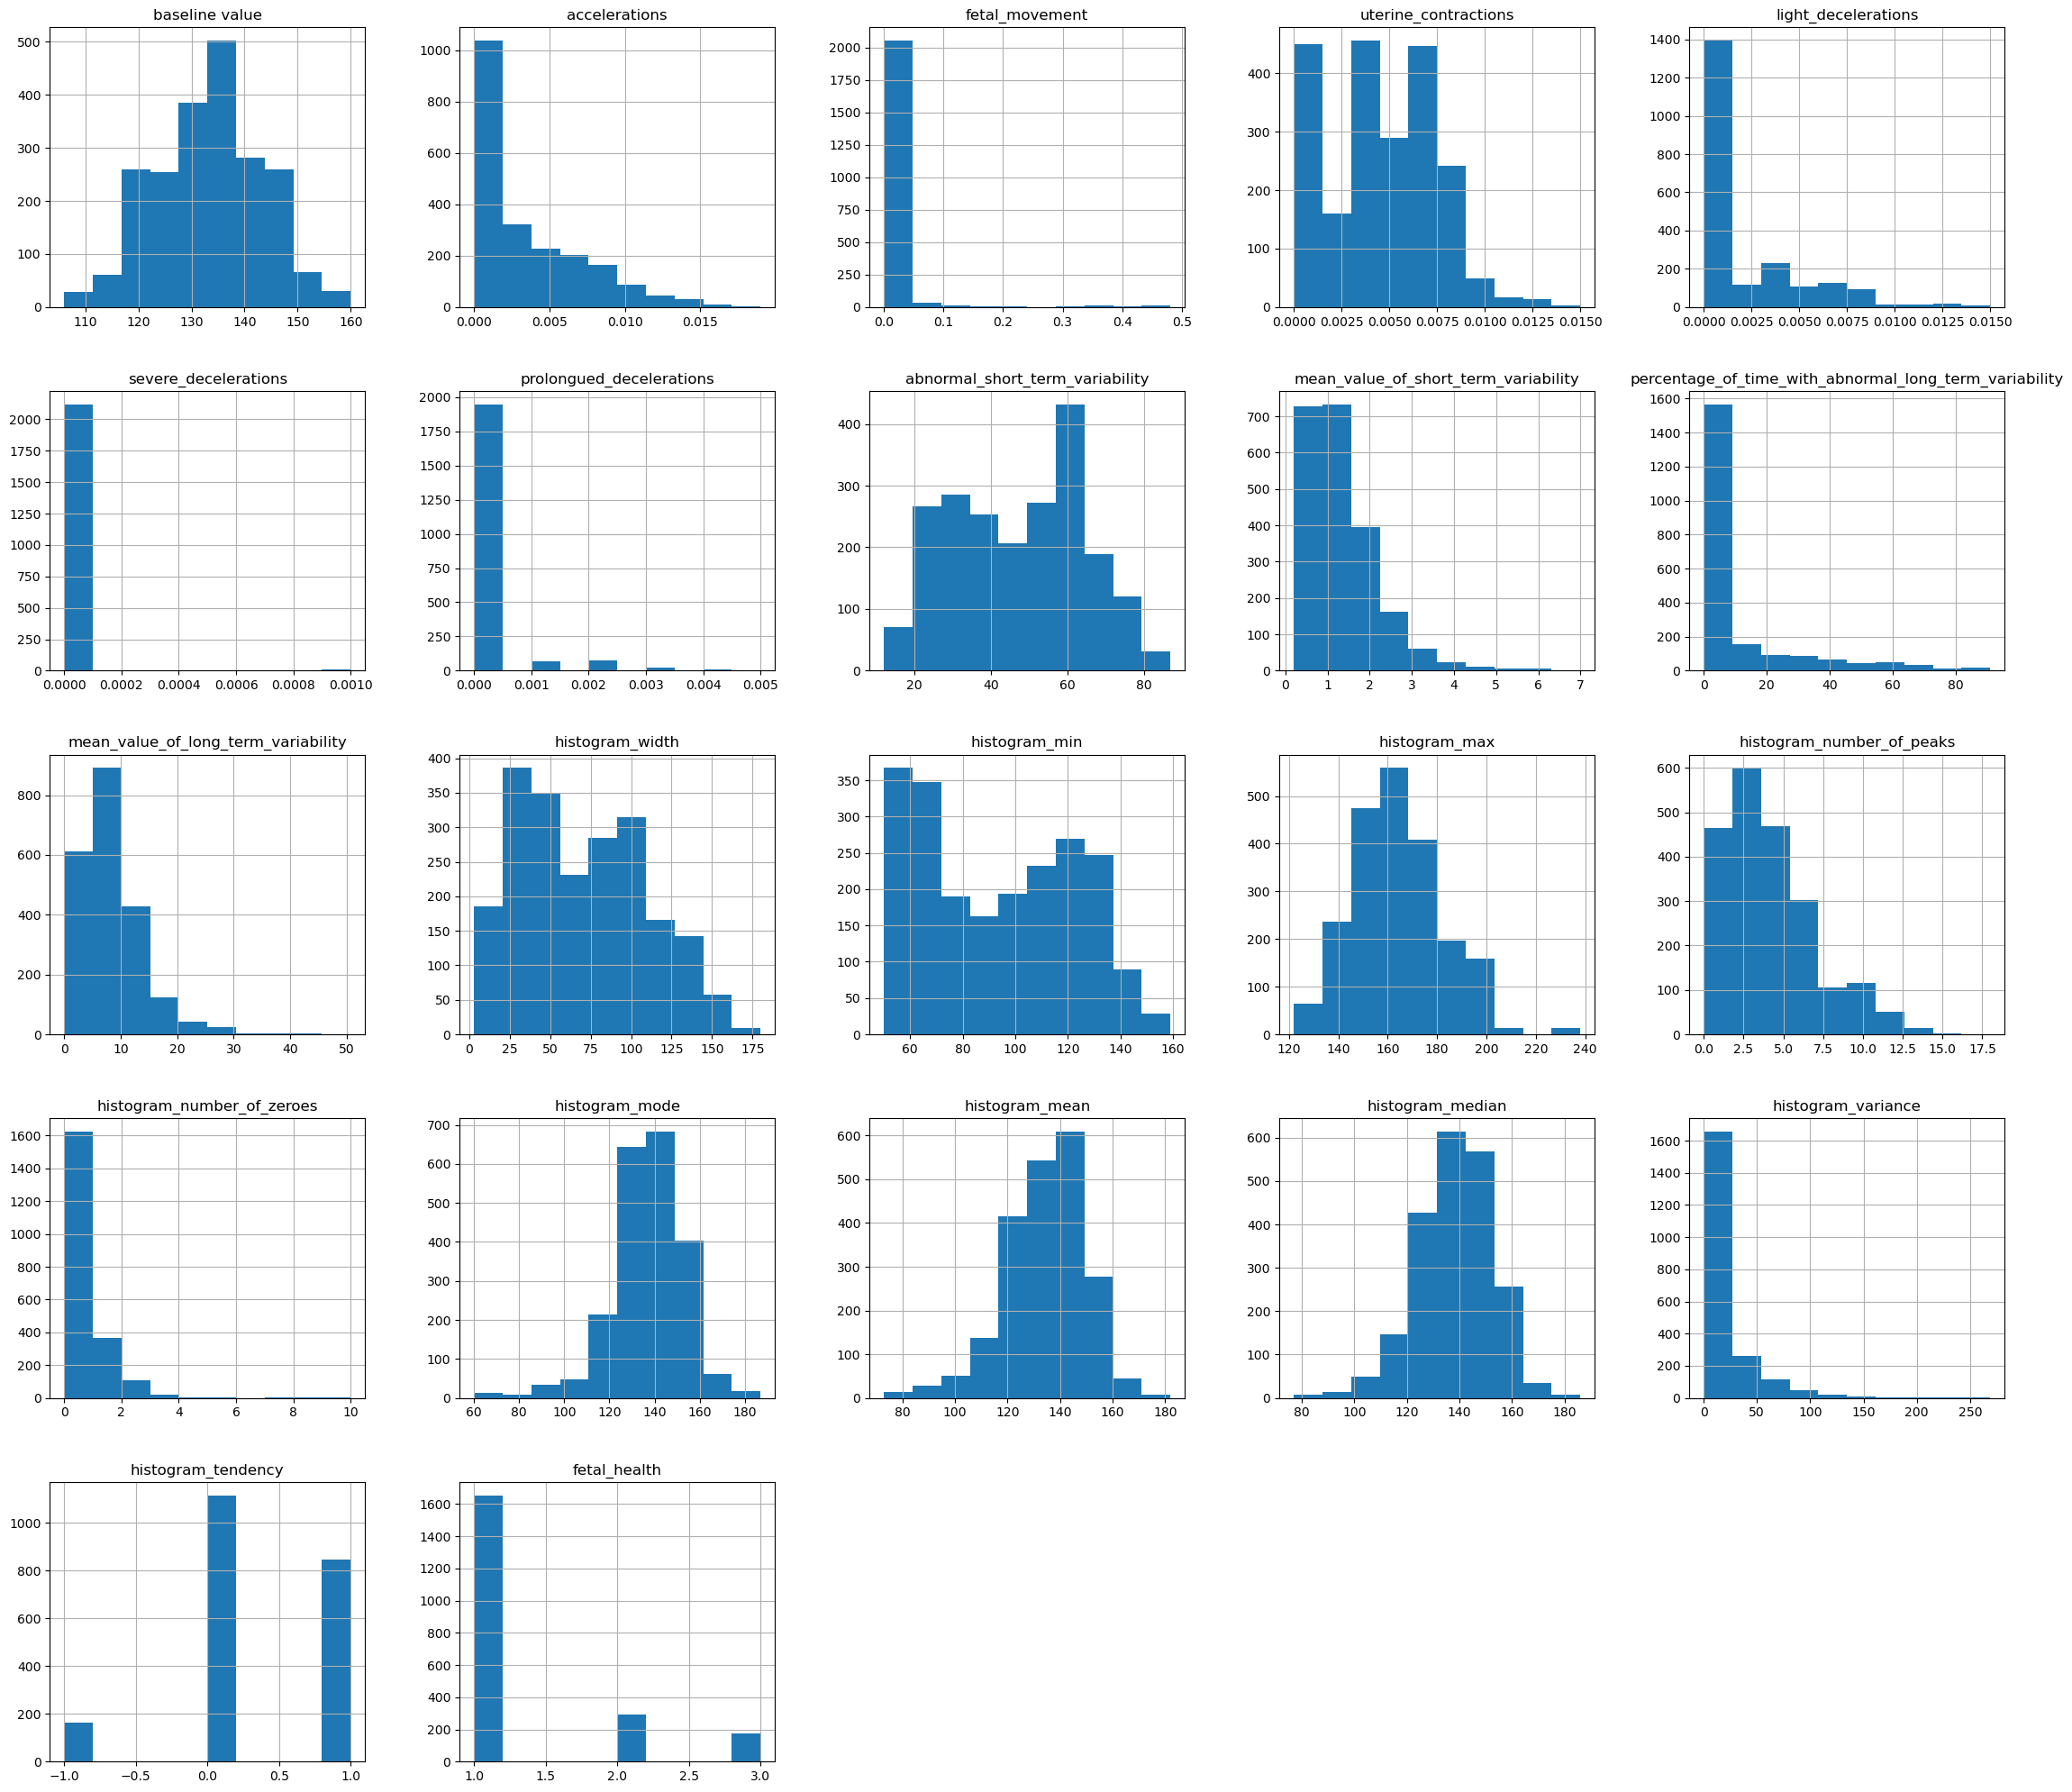

In [8]:
# Visualize distributions of features
plt.figure(figsize=(25, 20))
hist_plot = fetal_health_df.hist(figsize=(28, 25))
# plt.suptitle('Features Distribution Before Transformation: Visualize Distributions of Features', fontsize=20)
plt.show()

2. **Bar chart to show Distribution of Target**

Imbalanced with the majority as Normal, fewer as Suspect and Pathological.

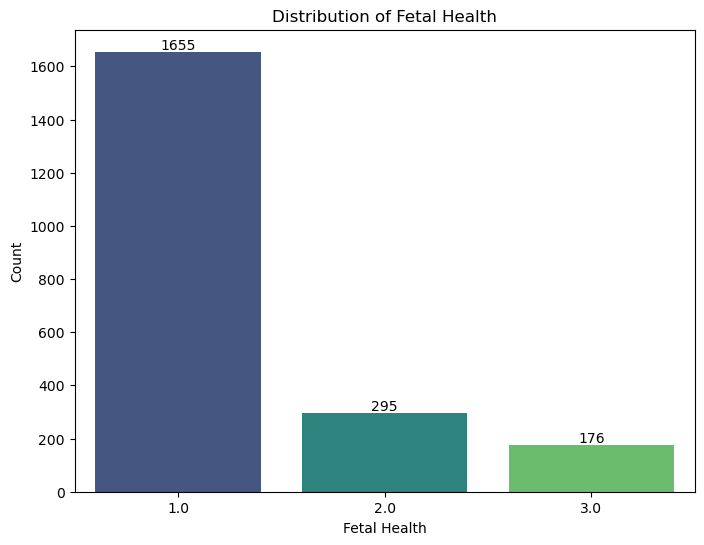

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=fetal_health_df, x='fetal_health', palette='viridis')
plt.title('Distribution of Fetal Health')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
for i in range(fetal_health_df['fetal_health'].nunique()):
    count = fetal_health_df['fetal_health'].value_counts().iloc[i]
    plt.text(i, count + 10, str(count), ha='center')
plt.show()

3. **Box plots to reveal outliers in features**:
    * Several features in the fetal health dataset have significant outliers.
    * Features with prominent outliers:
        * Accelerations
        * Fetal movement
        * Uterine contractions
        * Light decelerations
        * Prolonged decelerations
        * Severe decelerations
        * Mean value of long-term variability
    * Other features with outliers to a lesser extent:
        * Histogram min
        * Histogram max
        * Histogram mean
        * Histogram median
    * Reasons for not removing outliers:
        * Data is derived from CTG reports, unlikely to have data entry errors.
        * Outliers might be legitimate and part of the studied population.
        * Experts classify the data, so their assessments are trusted.
        * Retaining outliers helps avoid overfitting.





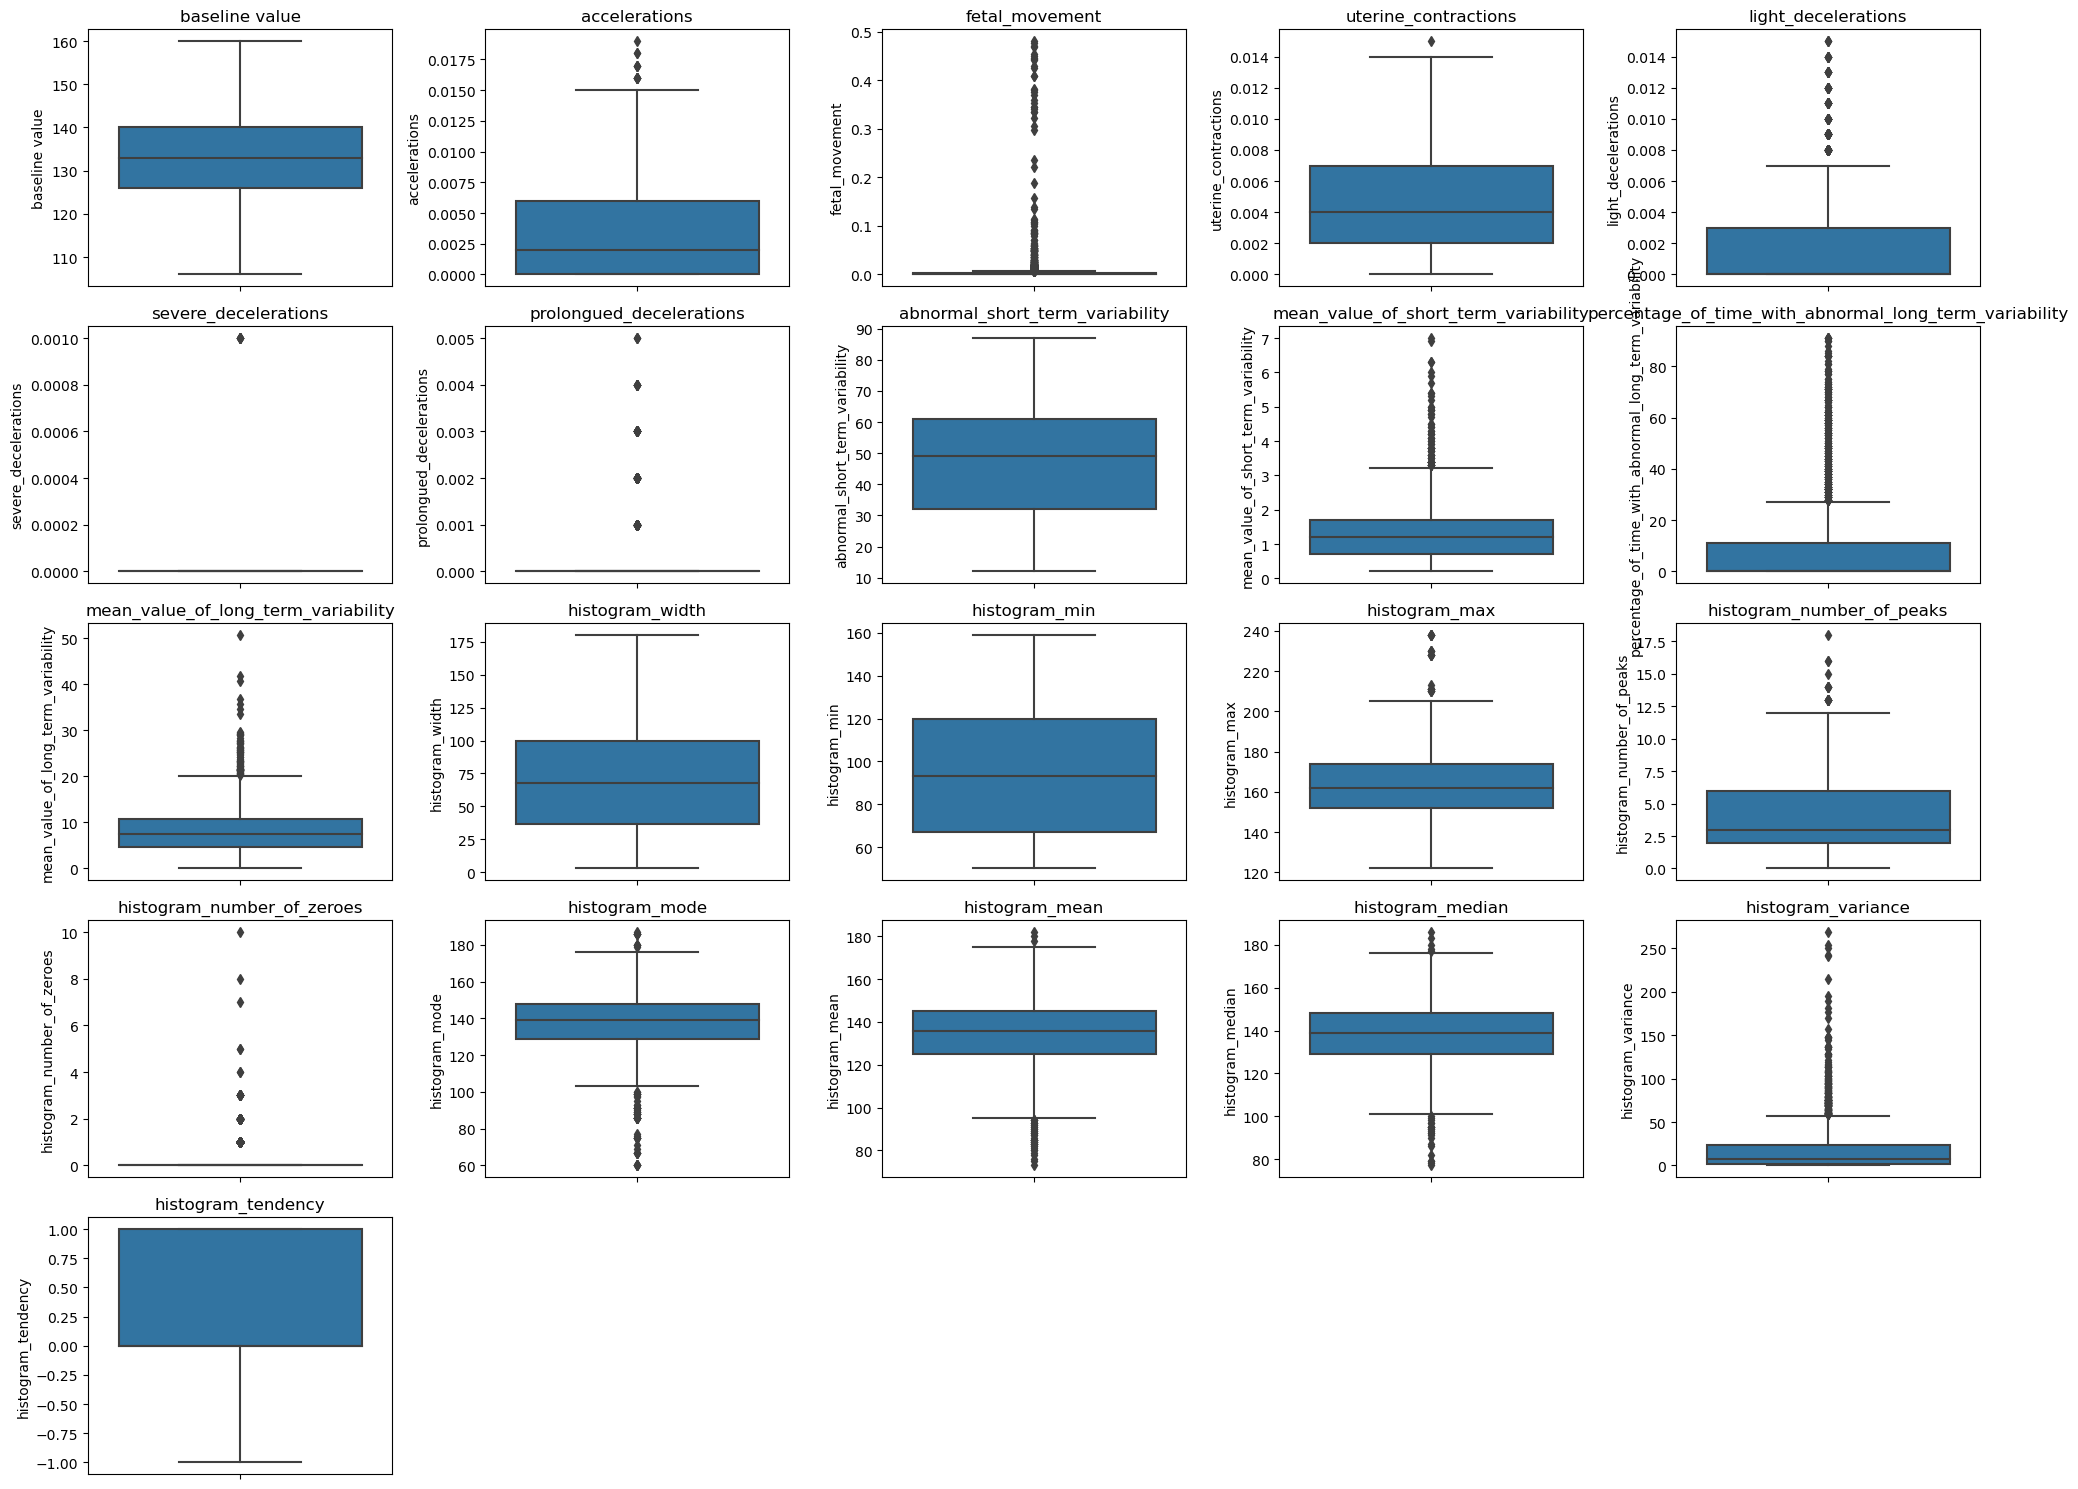

In [10]:
# Outlier detection

# Select features to visualize outliers
features = fetal_health_df.columns[:-1]  # Exclude the target variable

# Plot box plots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=fetal_health_df[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()

4. **Violin plots reveal distribution patterns**:
    * Baseline value, abnormal short-term variability, and mean short-term variability show differences between health categories.
    * Accelerations and uterine contractions vary significantly between healthy and unhealthy states.
    * Wide range of values for several features emphasizes the need for data scaling before modeling.



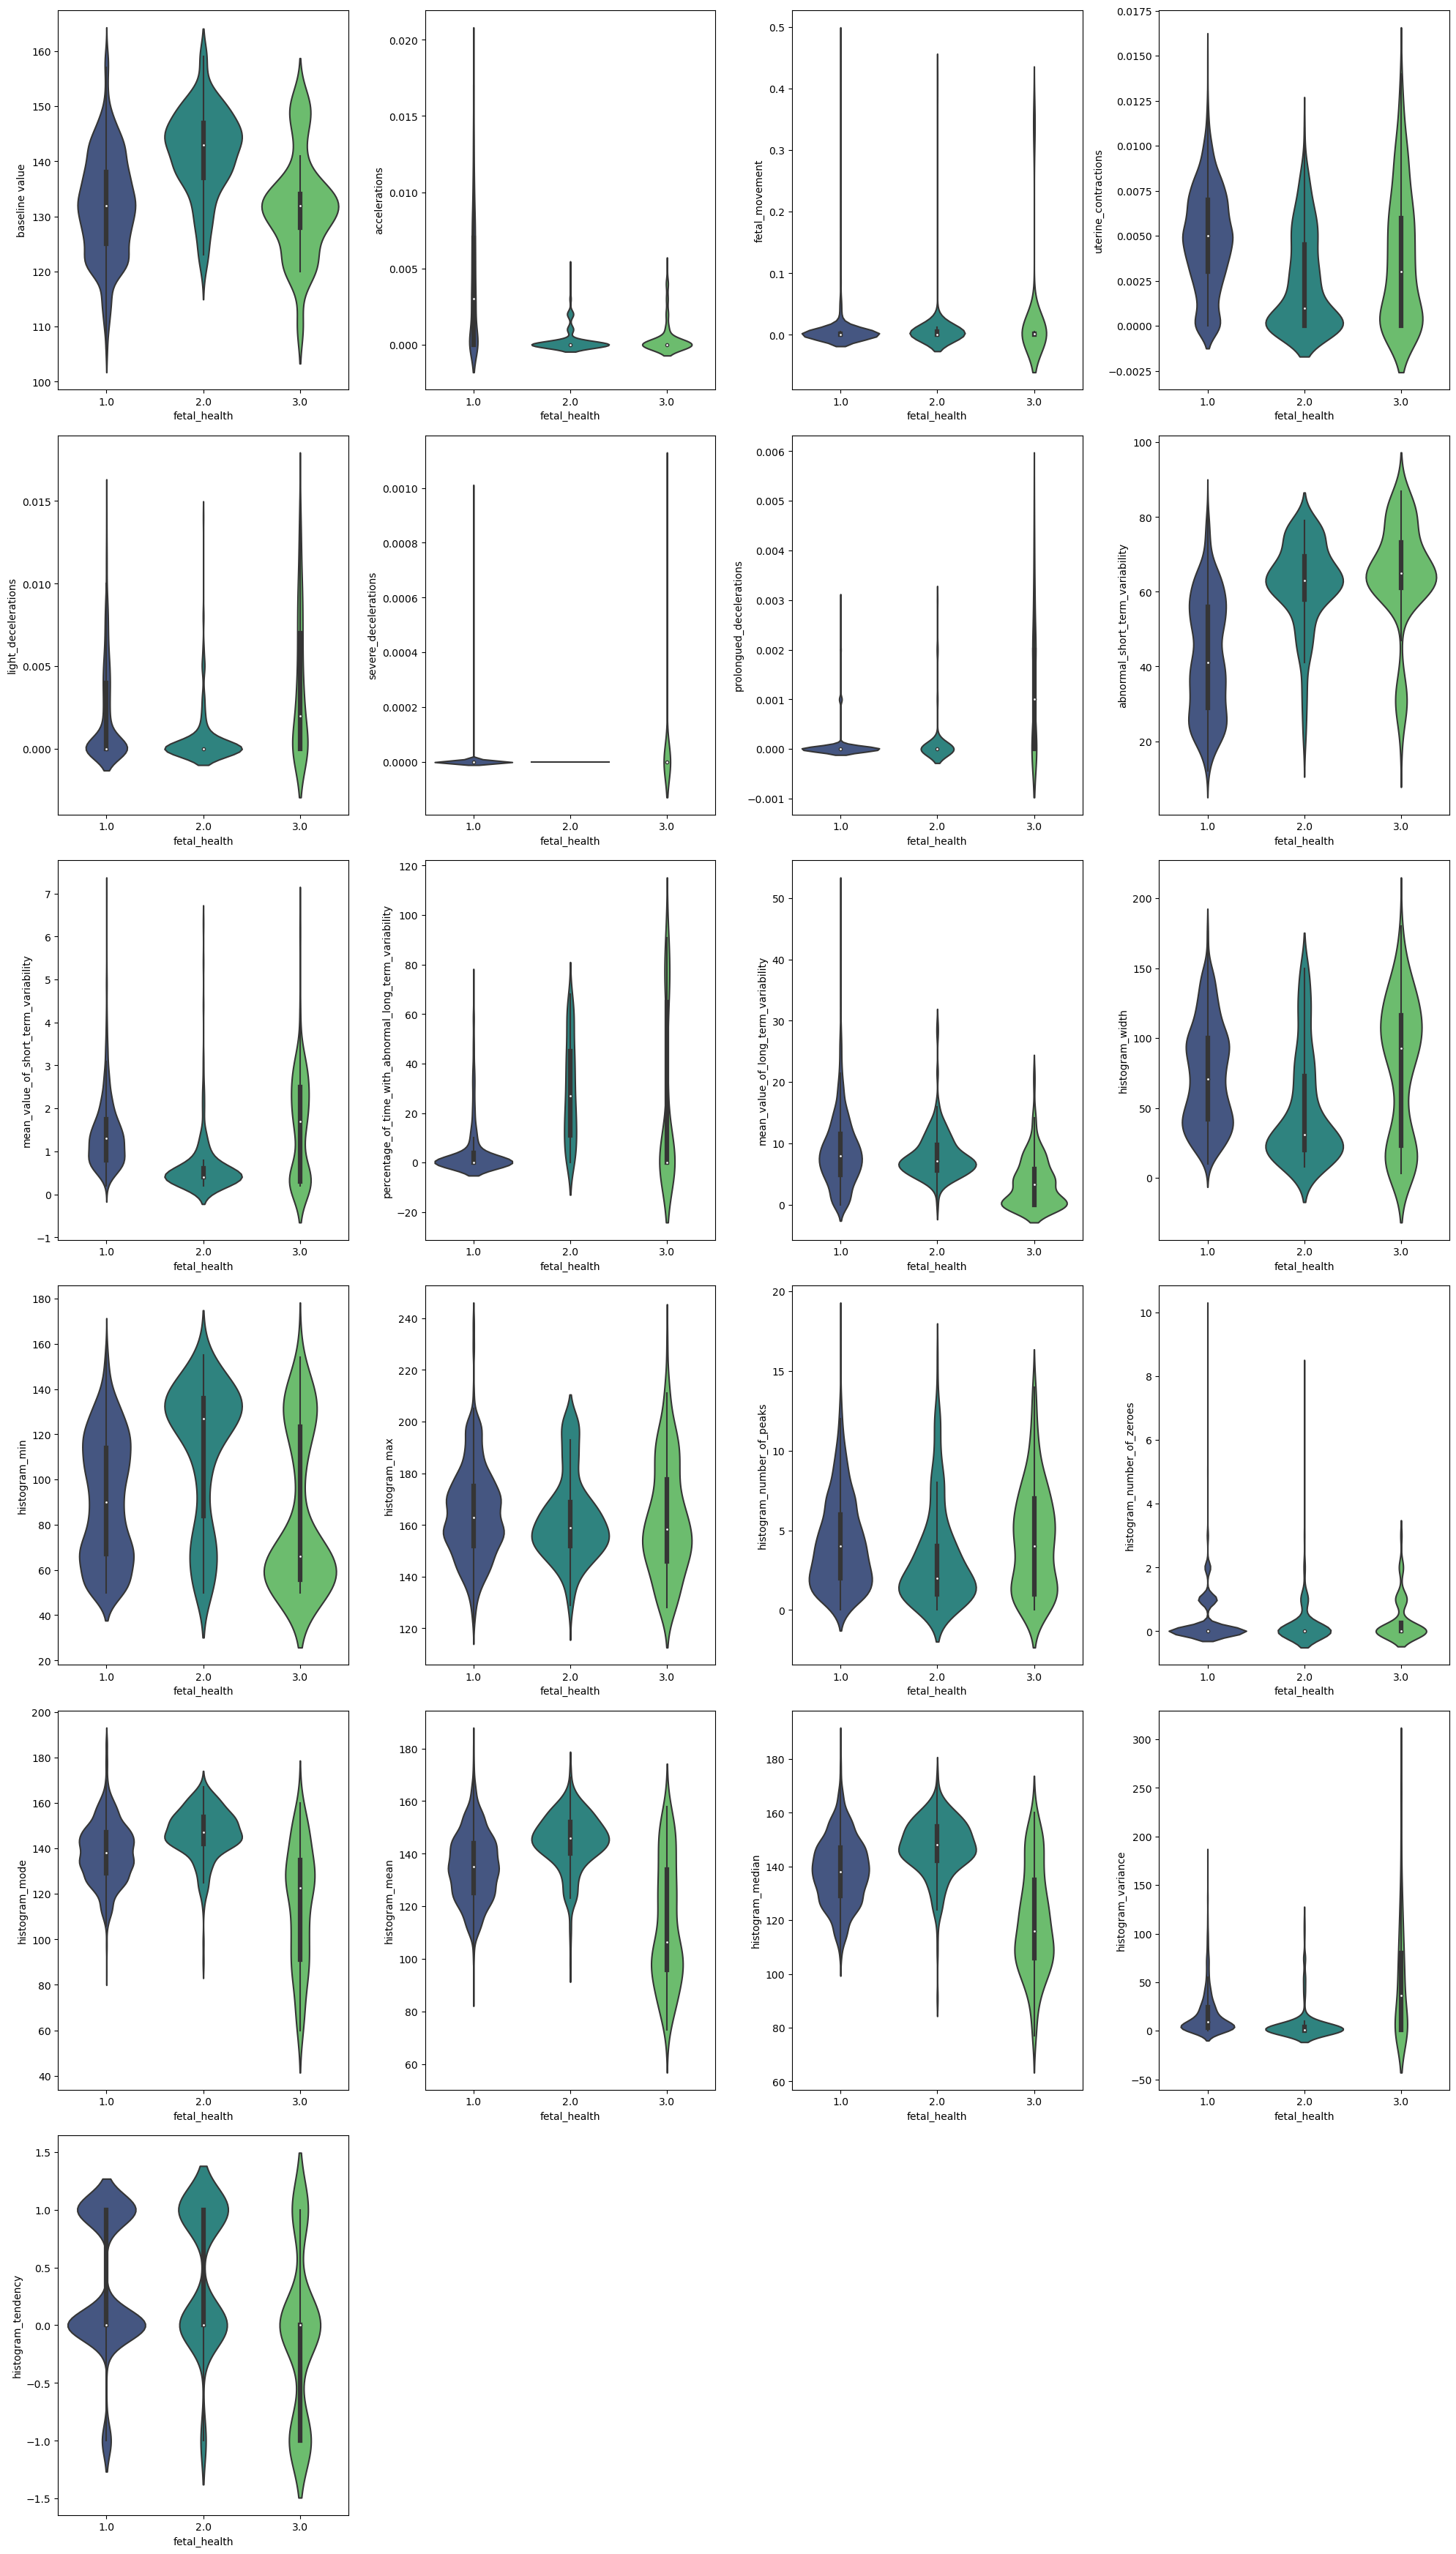

In [11]:
features = fetal_health_df.columns[:-1]
palette = sns.color_palette("viridis", n_colors=fetal_health_df['fetal_health'].nunique())

# Plot violin plots for each feature against the target variable
plt.figure(figsize=(20, 35))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 4, i)
    sns.violinplot(x='fetal_health', y=feature, data=fetal_health_df, palette=palette)

plt.tight_layout()
plt.show()

5. **Correlation matrix in heatmap**:
    * "Histogram_mean," "histogram_median," and "histogram_mode" are strongly correlated.
    * "Baseline_value" is also correlated with these features.
    * Highly correlated features may be dropped through dimension reduction.
    * Significant positive correlations with fetal health issues:
        * Prolonged decelerations (0.48)
        * Abnormal short-term variability (0.47)
        * Percentage of time with abnormal long-term variability (0.43)
    * Notable negative correlation:
        * Accelerations (-0.36)
    * Moderate positive correlations:
        * Histogram_variance (0.21)
        * Baseline value (0.15)
    * Several features show weak or no correlations, indicating limited impact on fetal health outcomes.



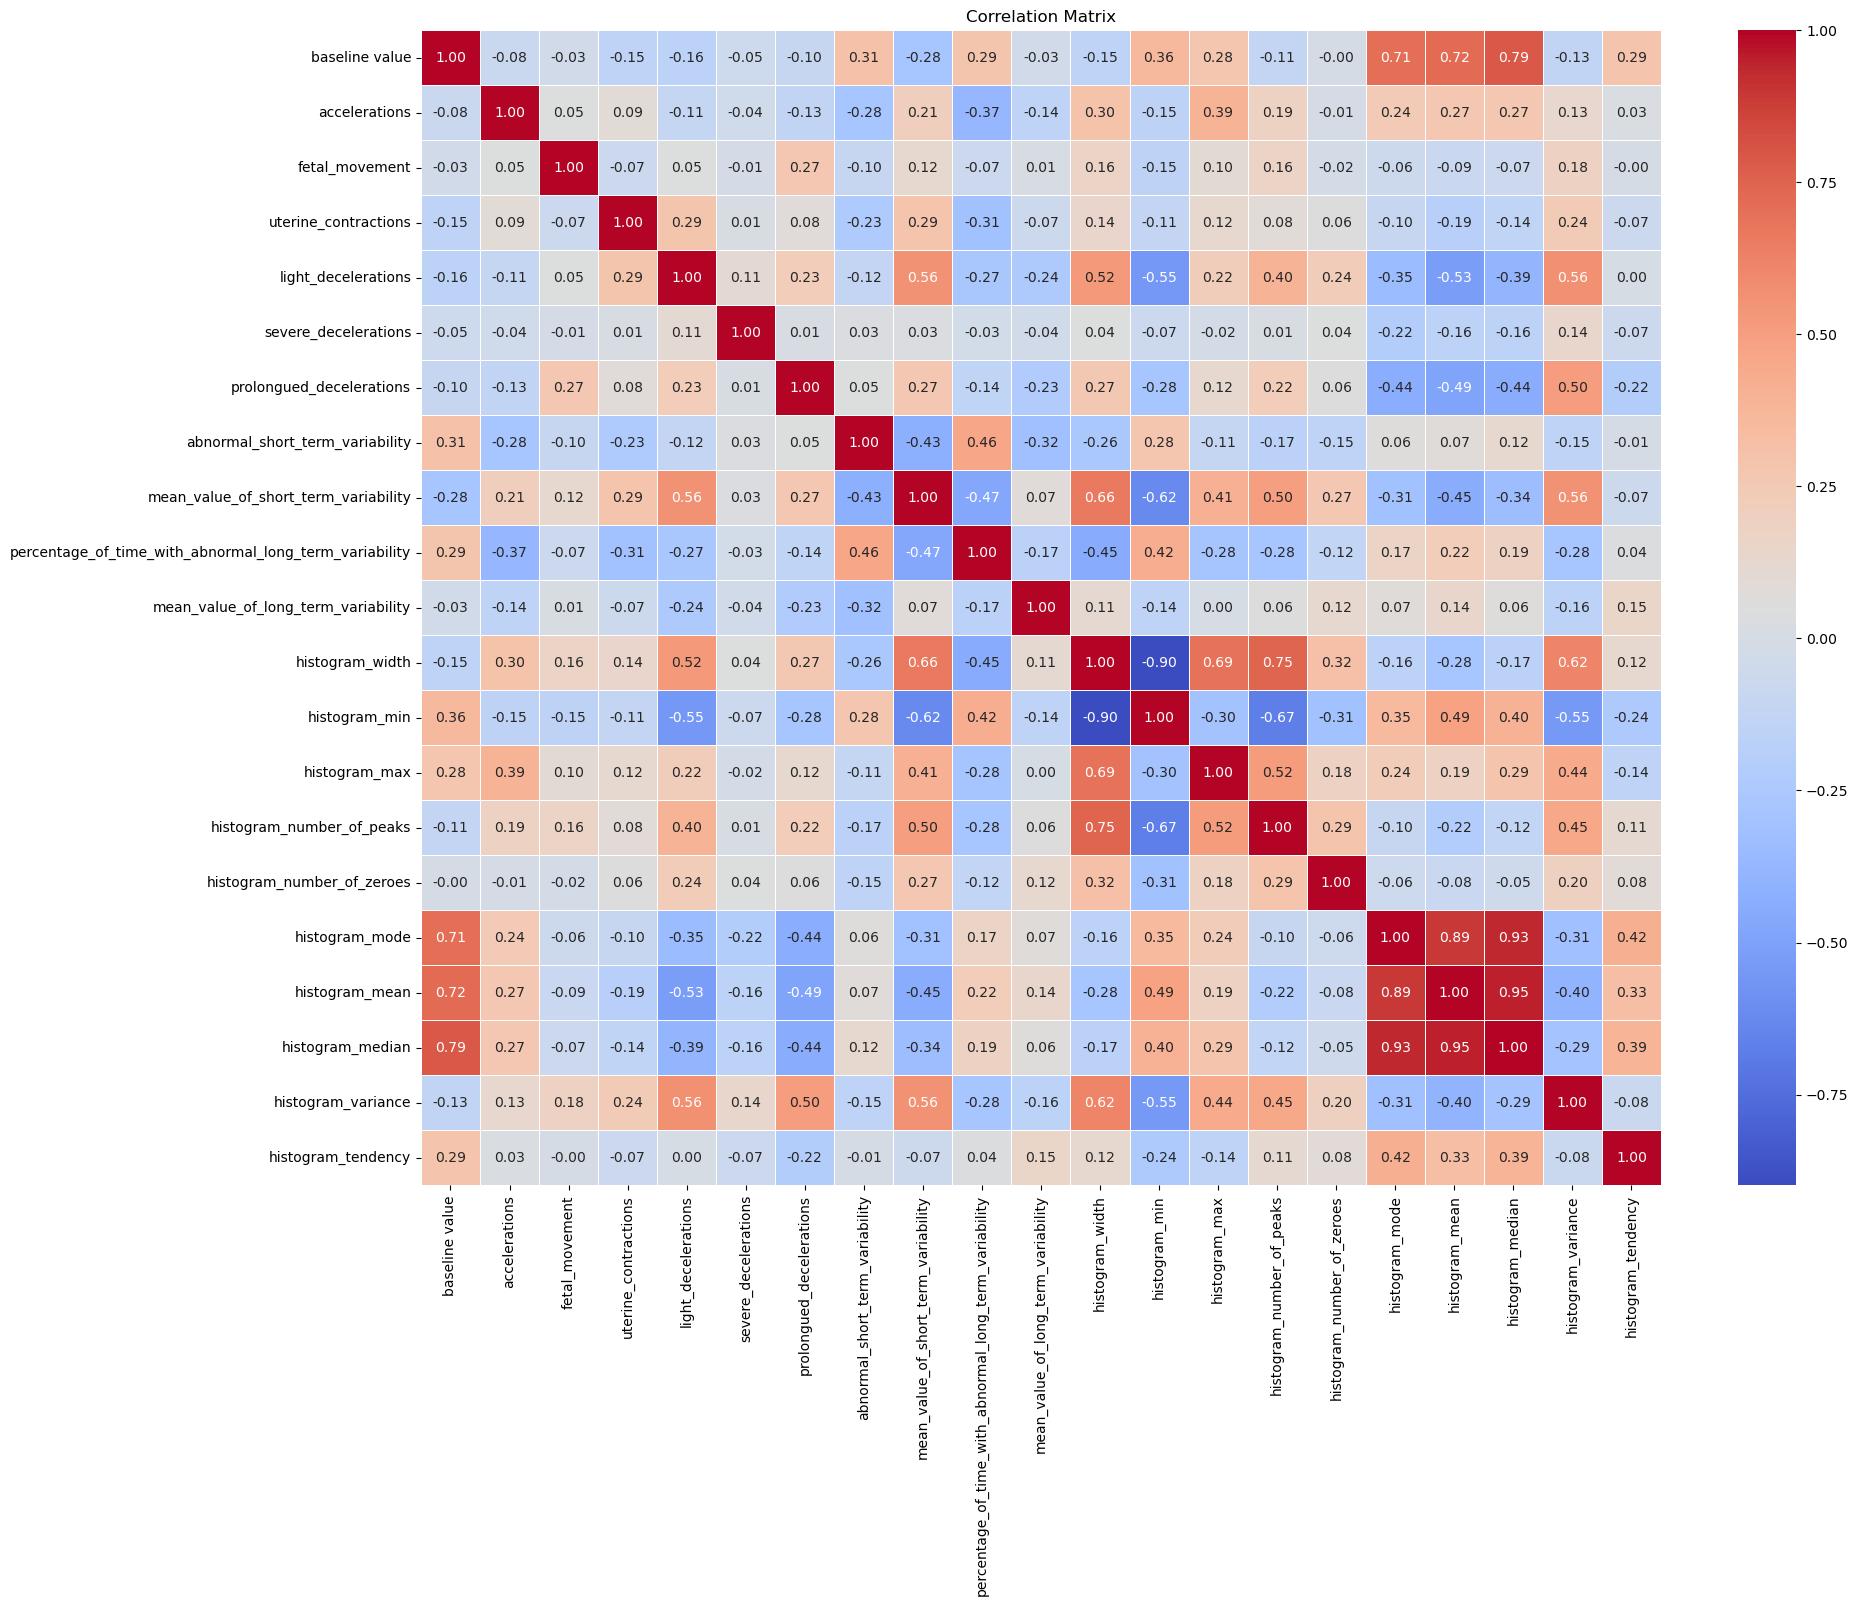

In [12]:
# Drop the target variable which is nominal
fetal_health_df_without_target = fetal_health_df.drop(columns=['fetal_health'])

# Correlation matrix without the target variable
plt.figure(figsize=(20, 15))
correlation_matrix = fetal_health_df_without_target.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

6. **Drop highly correlated features based on correlation matrix**:
    * Dropped features:
        * Histogram min
        * Histogram mean
        * Histogram median
    * Remaining variables:
        * Baseline value
        * Accelerations
        * Fetal movement
        * Uterine contractions
        * Light decelerations
        * Severe decelerations
        * Prolonged decelerations
        * Abnormal short-term variability
        * Mean value of short-term variability
        * Percentage of time with abnormal long-term variability
        * Mean value of long-term variability
        * Histogram width
        * Histogram max
        * Histogram number of peaks
        * Histogram number of zeroes
        * Histogram mode
        * Histogram variance
        * Histogram tendency
        * Fetal health


In [13]:
# Drop highly correlated features based on correlation matrix

# Set the correlation threshold
threshold = 0.75

# Generate the upper triangle matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

high_corr_features = upper[upper > threshold].stack().index.tolist()
print("Highly correlated features:", high_corr_features)


# Identify features to drop based on the threshold
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

# Drop the identified features from the original dataframe
fetal_health_df = fetal_health_df.drop(columns=to_drop)

# Print the remaining features
remaining_features = fetal_health_df.columns.tolist()
print("Remaining features after dropping highly correlated features:")
print(remaining_features)

# Print the dropped features
print("Dropped features:")
print(to_drop)

Highly correlated features: [('baseline value', 'histogram_median'), ('histogram_mode', 'histogram_mean'), ('histogram_mode', 'histogram_median'), ('histogram_mean', 'histogram_median')]
Remaining features after dropping highly correlated features:
['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_variance', 'histogram_tendency', 'fetal_health']
Dropped features:
['histogram_min', 'histogram_mean', 'histogram_median']


In [14]:
fetal_health_df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_variance',
       'histogram_tendency', 'fetal_health'],
      dtype='object')

In [15]:
fetal_health_df.shape

(2126, 19)

### M4.  Model Exploration and Model Selection

1. **Apply SMOTE to handle imbalanced labels**
2.  **Partition dataset 80:20**
3.  **Standardizaion on feature variables in both training and validation datasets**
4. **10-fold cross-validation in GridSearchCV for each model**


In [16]:
fetal_health_df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  \
0                                               43.0        
1                                                0.0        
2                                                0.0        
3                                                0.0        
4                                                0.0        

   mean_value_of_long_term_variability  histogram_width  histogram_max  \
0                                  2.4             64.0          126.0   
1                                 10.4            130.0          198.0   
2                                 13.4            130.0          198.0   
3                                 23.0            117.0          170.0   
4                                 19.9            117.0          170.0   

   histogram_number_of_peaks  histogram_number_of_zeroes  histogram_mode  \
0                        2.0                         0.0           120.0   
1                        6.0                         1.0           141.0   
2                        5.0                         1.0           141.0   
3                       11.0                         0.0           137.0   
4                        9.0                         0.0           137.0   

   histogram_variance  histogram_tendency  fetal_health  
0                73.0                 1.0           2.0  
1                12.0                 0.0           1.0  
2                13.0                 0.0           1.0  
3                13.0                 1.0           1.0  
4                11.0                 1.0           1.0

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle



KeyboardInterrupt: 

1. **Apply SMOTE to handle imbalanced labels**:
    * SMOTE used to balance the distribution of fetal health classes.
2. **Partition dataset 80:20**

Original dataset shape: (1700, 18)
Resampled dataset shape: (3987, 18)


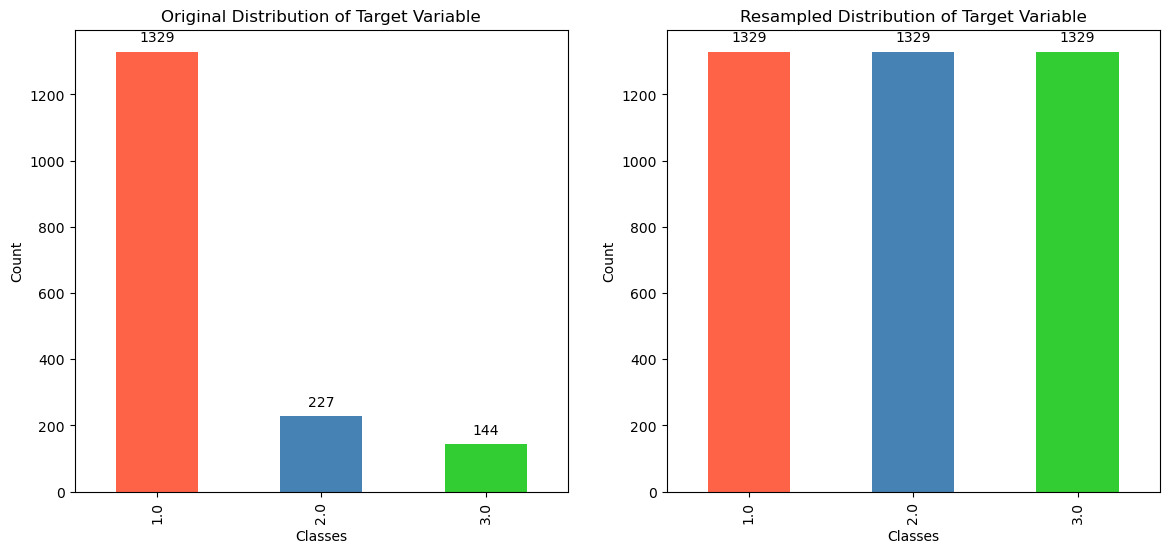

In [ ]:
# Assign values to features as X and target as y
X = fetal_health_df.drop('fetal_health', axis=1)
y = fetal_health_df['fetal_health']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

# Apply SMOTE to deal with imbalanced labels and Partition
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Original dataset shape:", X_train.shape)
print("Resampled dataset shape:", X_resampled.shape)

# Plotting the distribution of the target variable before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Define a new color palette
colors = ['#FF6347', '#4682B4', '#32CD32']  # Tomato, SteelBlue, LimeGreen

# Original distribution
y_train_counts = y_train.value_counts()
bars1 = y_train_counts.plot(kind='bar', ax=ax[0], color=[colors[int(i) - 1] for i in y_train_counts.index])
ax[0].set_title('Original Distribution of Target Variable')
ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Count')

# Add counts on top of bars
for bar in bars1.patches:
    ax[0].annotate(f'{int(bar.get_height())}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

# Resampled distribution
y_resampled_counts = pd.Series(y_resampled).value_counts()
bars2 = y_resampled_counts.plot(kind='bar', ax=ax[1], color=[colors[int(i) - 1] for i in y_resampled_counts.index])
ax[1].set_title('Resampled Distribution of Target Variable')
ax[1].set_xlabel('Classes')
ax[1].set_ylabel('Count')

# Add counts on top of bars
for bar in bars2.patches:
    ax[1].annotate(f'{int(bar.get_height())}', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.show()

3.  **Standardizaion on feature variables in both training and validation datasets**

KeyboardInterrupt: 

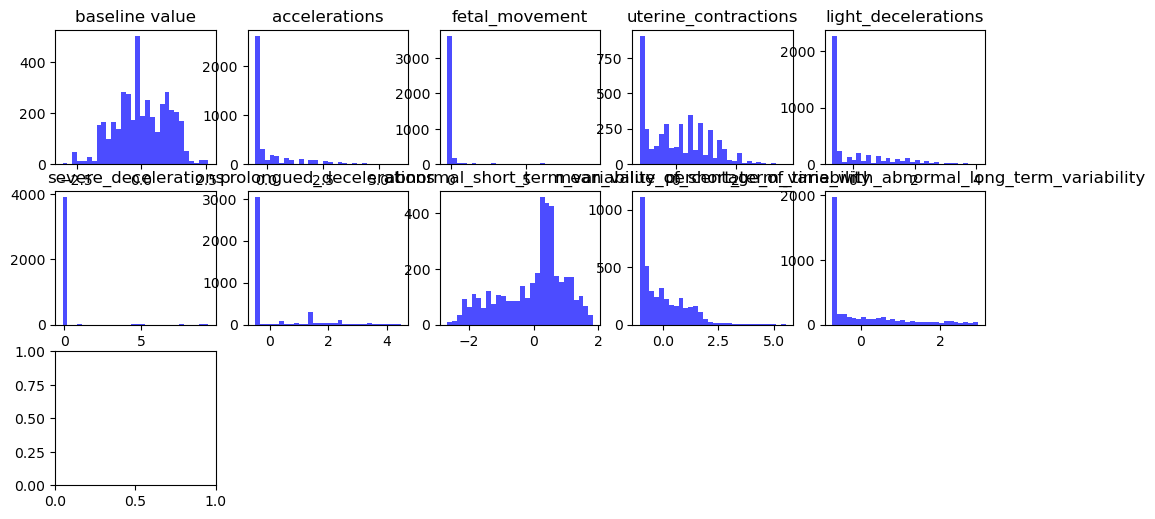

In [ ]:
# Standardize the features using the training data statistics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_val_scaled = scaler.transform(X_val)

# Visualize distributions of X_train_scaled and X_val_scaled
def plot_histograms(X_scaled, feature_names, title):
    plt.figure(figsize=(12, 8))
    for i in range(X_scaled.shape[1]):
        plt.subplot(4, 5, i + 1)
        plt.hist(X_scaled[:, i], bins=30, alpha=0.7, color='blue')
        plt.title(feature_names[i])
    plt.suptitle(title)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Get feature names
feature_names = X.columns

# Plot histograms for the training data
plot_histograms(X_train_scaled, feature_names, 'Histograms of Scaled Training Data')

# Plot histograms for the validation data
plot_histograms(X_val_scaled, feature_names, 'Histograms of Scaled Validation Data')


3. **10-fold cross-validation in GridSearchCV**:
    * Balances bias and variance by splitting data into 10 subsets.
    * Each subset used once for validation and nine times for training.
    * Provides robust performance estimates and reduces overfitting.
    * Suitable for our dataset of 3987 samples (after oversampling).
    * Ensures thorough evaluation without significantly increasing computation time.
    * Widely accepted standard in machine learning for generalizing well to unseen data.

Models

1. KNN

In [ ]:
# Define the KNN model and hyperparameter grid
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_resampled)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_resampled)

# Capture the best cross-validation accuracy
best_knn_cv_accuracy = grid_search.best_score_
print("Best Cross-Validation Accuracy:", best_knn_cv_accuracy)

# Save the best model to a file
with open('best_KNN_model.pkl', 'wb') as file:
    pickle.dump(best_knn, file)

KeyboardInterrupt: 

2. Naïve Bayes Classifier

Given that all features in our dataset are continuous numbers and show no extreme deviations from normality after standardization, we apply the Gaussian Naive Bayes classifier. This is because it assumes that continuous features follow a Gaussian (normal) distribution and uses this assumption to calculate the probabilities of different outcomes.

In [ ]:

# Define the Gaussian Naive Bayes model and hyperparameter grid
gnb = GaussianNB()
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gnb, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_resampled)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_gnb = grid_search.best_estimator_
best_gnb.fit(X_train_scaled, y_resampled)

# Capture the best cross-validation accuracy
best_gnb_cv_accuracy = grid_search.best_score_
print("Best Cross-Validation Accuracy:", best_gnb_cv_accuracy)

with open('best_GNB_model.pkl', 'wb') as file:
    pickle.dump(best_gnb, file)

Best Parameters: {'var_smoothing': 0.003511191734215131}
Best Cross-Validation Accuracy: 0.7737805569199381


3.1 Random Forest

In [ ]:
# Define the Random Forest model and hyperparameter grid
rf = RandomForestClassifier(random_state=1)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_resampled)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train_scaled, y_resampled)

# Capture the best cross-validation accuracy
best_rf_cv_accuracy = grid_search.best_score_
print("Best Cross-Validation Accuracy:", best_rf_cv_accuracy)

# Save the best model to a file
with open('best_RF_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)


Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9826985806224103


3.2 Gradient Boosting Classifier

In [ ]:
# Define the Gradient Boosting model and hyperparameter grid
gb = GradientBoostingClassifier(random_state=1)
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_resampled)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_gb = grid_search.best_estimator_
best_gb.fit(X_train_scaled, y_resampled)

# Capture the best cross-validation accuracy
best_gb_cv_accuracy = grid_search.best_score_
print("Best Cross-Validation Accuracy:", best_gb_cv_accuracy)

# Save the best model to a file
with open('best_GB_model.pkl', 'wb') as file:
    pickle.dump(best_gb, file)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.9751747459100011


4. Logistic regression

A log transformation is performed to reduce the skewness of the feature variables by compressing the range of the data. This transformation can also reduce the impact of outliers. After log transformation and standardization, a logistic regression model is applied. The same preprocessing steps are applied before using models like LDA and SVM, which benefit from more normally distributed data.

We did not do log transformation on data before applying on former models, since the log transformation may alter the relative distance and tree models are insensitive to the distribution of features.

In [ ]:
print("\nSummary statistics of the dataset:")
fetal_health_df.describe().T


Summary statistics of the dataset:


count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe_decelerations                                  0.000    0.000    0.001  
prolongued_decelerations                              0.000    0.000    0.005  
abnormal_short_term_variability                      49.000   61.000   87.000  
mean_value_of_short_term_variability                  1.200    1.700    7.000  
percentage_of_time_with_abnormal_long_term_vari...    0.000   11.000   91.000  
mean_value_of_long_term_variability                   7.400   10.800   

1)Transformation

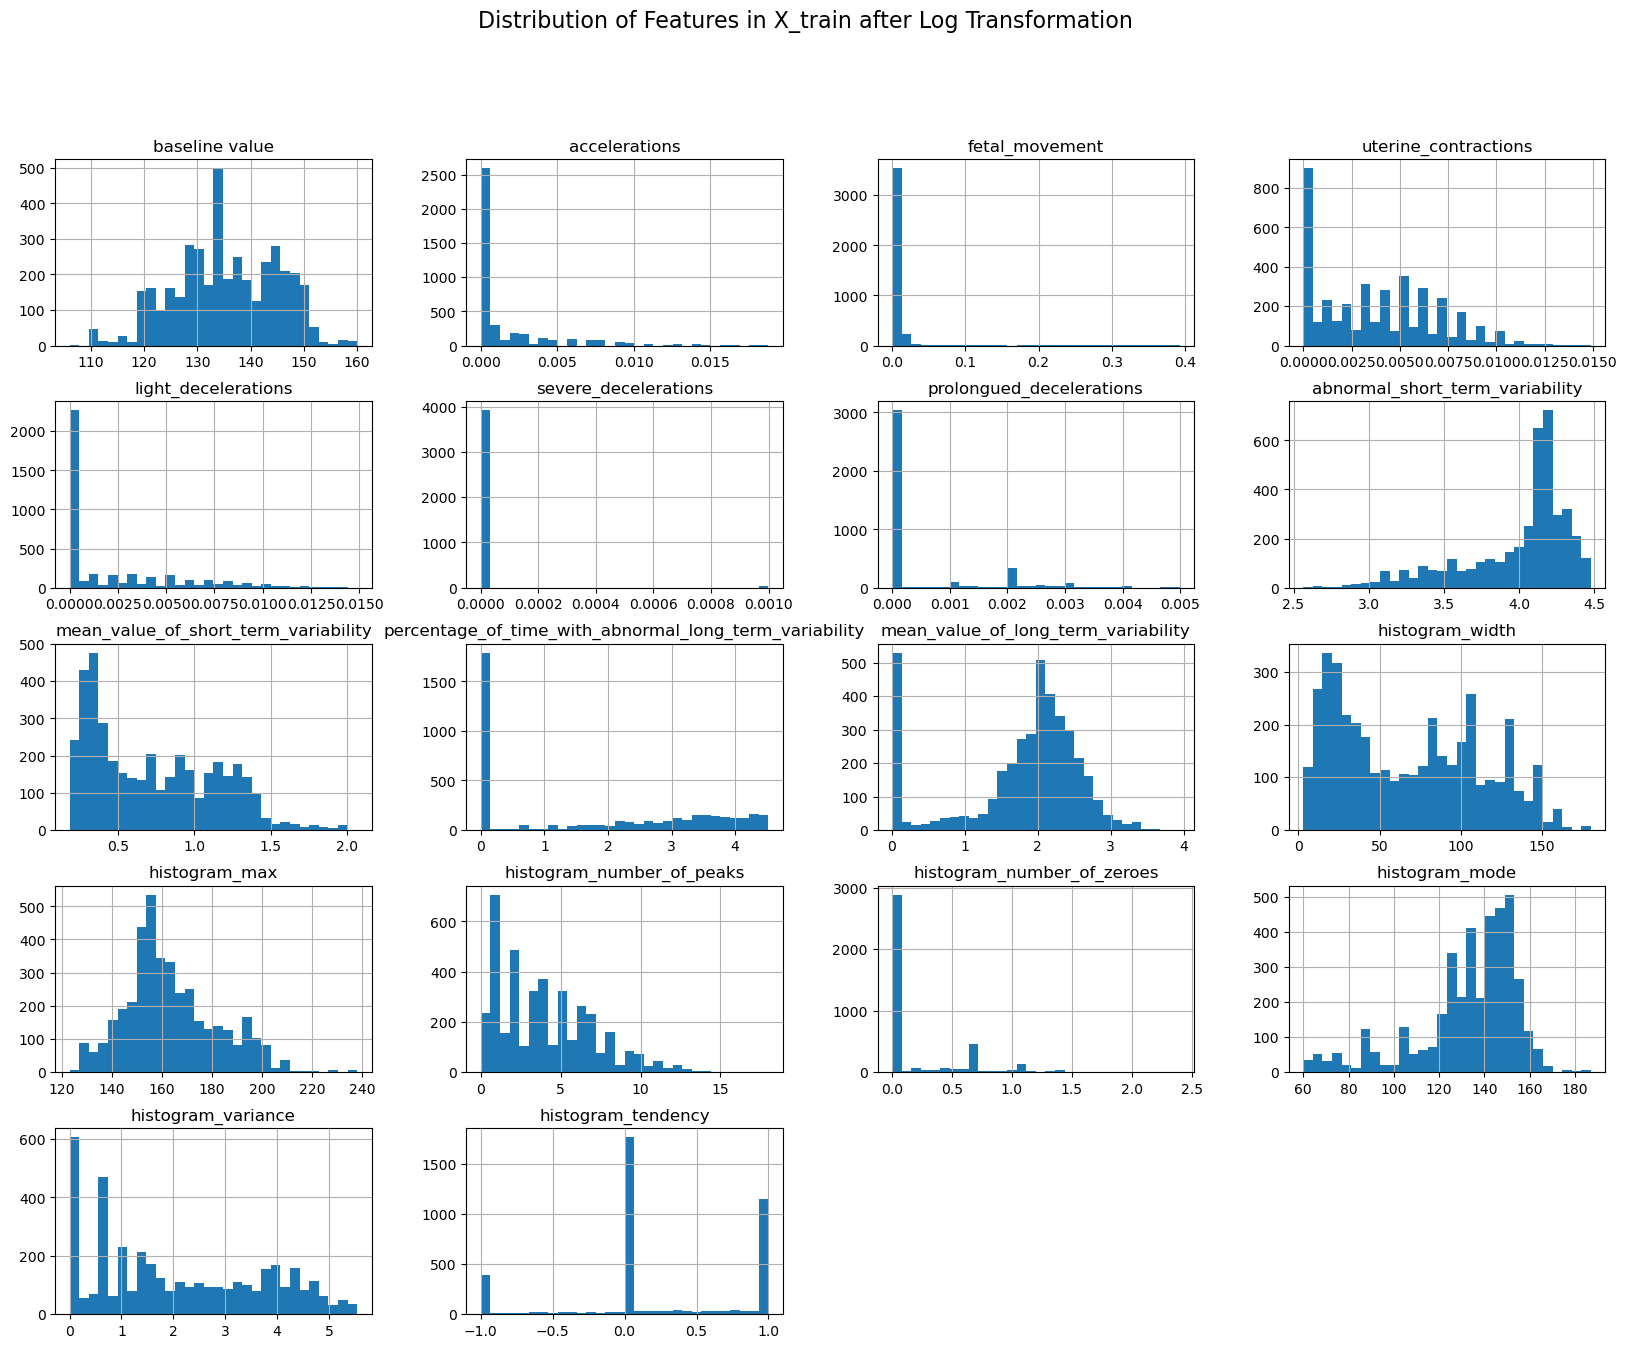

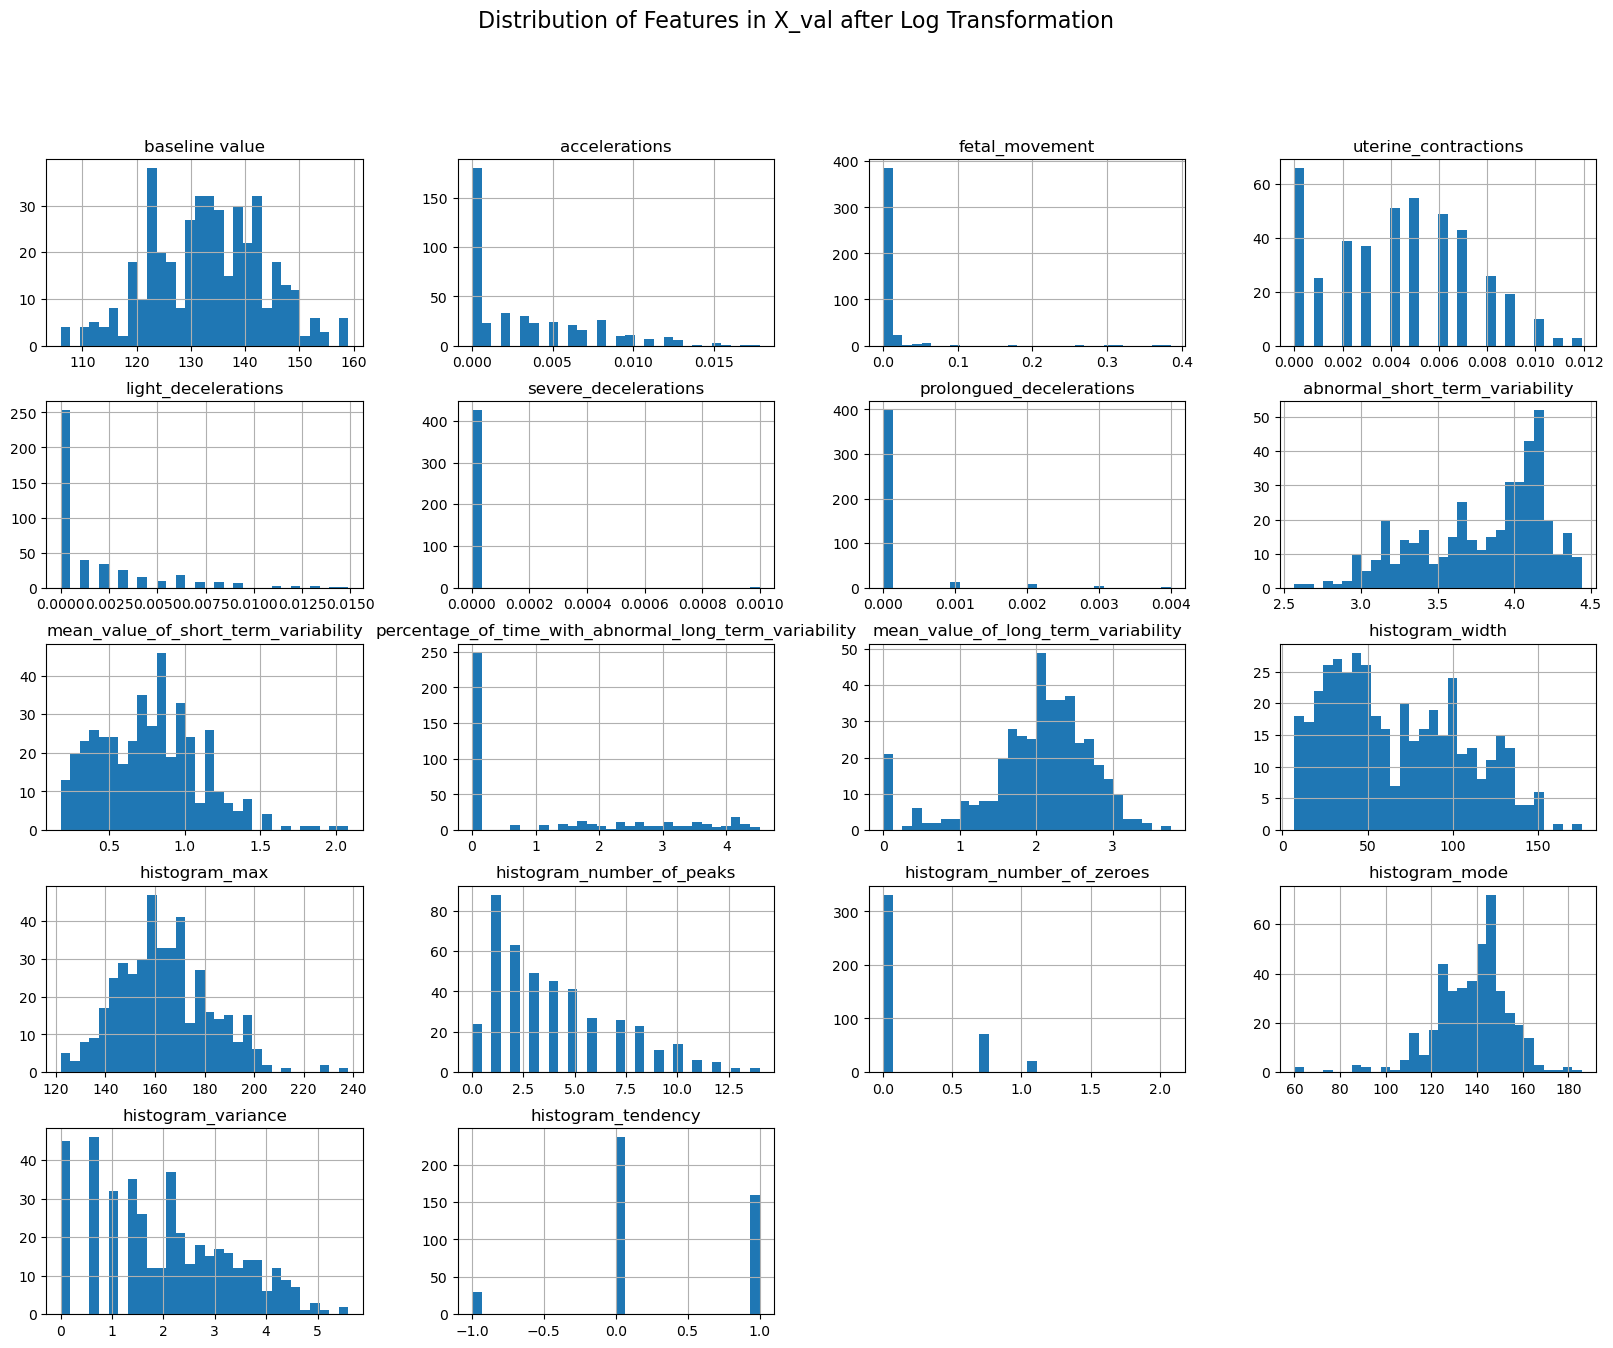

In [ ]:
# Convert X_resampled and X_val to DataFrames for easier manipulation
X_train_df = pd.DataFrame(X_resampled, columns=fetal_health_df.columns[:-1])  # Assuming the last column is the target variable
X_val_df = pd.DataFrame(X_val, columns=fetal_health_df.columns[:-1])  # Assuming the last column is the target variable

# List of skewed features
skewed_features = ['accelerations', 'fetal_movement', 'uterine_contractions',
                   'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
                   'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
                   'percentage_of_time_with_abnormal_long_term_variability',
                   'mean_value_of_long_term_variability', 'histogram_number_of_zeroes',
                   'histogram_variance']

# Apply log transformation to the skewed features in both datasets
X_train_df[skewed_features] = X_train_df[skewed_features].apply(lambda x: np.log1p(x))
X_val_df[skewed_features] = X_val_df[skewed_features].apply(lambda x: np.log1p(x))

# Plot histograms for each feature to visualize distributions
def plot_histograms(df, title):
    df.hist(bins=30, figsize=(20, 15))
    plt.suptitle(title, fontsize=16)
    plt.show()

# Visualize the distributions for X_train and X_val
plot_histograms(X_train_df, 'Distribution of Features in X_train after Log Transformation')
plot_histograms(X_val_df, 'Distribution of Features in X_val after Log Transformation')

2)LR model

In [ ]:
# Convert DataFrames back to numpy arrays
X_train_transformed = X_train_df.to_numpy()
X_val_transformed = X_val_df.to_numpy()

# Standardize the transformed features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_transformed)
X_val_standardized = scaler.transform(X_val_transformed)

# Define the logistic regression model and hyperparameter grid
log_reg = LogisticRegression(max_iter=10000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_standardized, y_resampled)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train_standardized, y_resampled)

# Capture the best cross-validation accuracy
best_log_reg_cv_accuracy = grid_search.best_score_
print("Best Cross-Validation Accuracy:", best_log_reg_cv_accuracy)

# Save the best model to a file
with open('best_LogisticRegression_model.pkl', 'wb') as file:
    pickle.dump(best_log_reg, file)


Best Parameters: {'C': 100, 'solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.8853780179090943


6.1 LDA trained with Outliers

In [ ]:
# Use variables (X_train_standardized) after transformation and standardization

# Define the LDA model and hyperparameter grid
lda = LinearDiscriminantAnalysis()

param_grid = [
    {'solver': ['svd'], 'shrinkage': [None]},
    {'solver': ['lsqr', 'eigen'], 'shrinkage': ['auto', 0.1, 0.5, 1.0]}
]

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(lda, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_standardized, y_resampled)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_lda = grid_search.best_estimator_
best_lda.fit(X_train_standardized, y_resampled)

# Capture the best cross-validation accuracy
best_lda_cv_accuracy = grid_search.best_score_
print("Best Cross-Validation Accuracy:", best_lda_cv_accuracy)

# Save the best model to a file
with open('best_LDA_model.pkl', 'wb') as file:
    pickle.dump(best_lda, file)


Best Parameters: {'shrinkage': None, 'solver': 'svd'}
Best Cross-Validation Accuracy: 0.8276948653039635


6.2 LDA trained with outliers removed

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Function to apply log transformation
def log_transform(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # log1p is log(x + 1), safe for zero values
    return df

# Copy the original training data to preserve the original dataset
X_train_clean = X_resampled.copy()

# 1. Apply the IQR method to remove outliers from relevant features
features_with_outliers = [
    'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'prolongued_decelerations',
    'severe_decelerations', 'mean_value_of_long_term_variability', 'histogram_max' ]

for feature in features_with_outliers:
    X_train_clean = remove_outliers_iqr(X_train_clean, feature)

# 2. Apply log transformation
X_train_clean = log_transform(X_train_clean, features_with_outliers)

# 3. Align the target variable after removing outliers
y_train_clean = y_resampled.loc[X_train_clean.index]

# 4. Standardize the dataset after removing outliers and log transformation
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_clean)





# Define the LDA model and hyperparameter grid
lda = LinearDiscriminantAnalysis()

param_grid = [
    {'solver': ['svd'], 'shrinkage': [None]},
    {'solver': ['lsqr', 'eigen'], 'shrinkage': ['auto', 0.1, 0.5, 1.0]}
]

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(lda, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_std, y_train_clean)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_lda2 = grid_search.best_estimator_
best_lda2.fit(X_train_std, y_train_clean)

# Capture the best cross-validation accuracy
best_lda_cv_accuracy2 = grid_search.best_score_
print("Best Cross-Validation Accuracy:", best_lda_cv_accuracy2)


# Save the best model to a file
with open('best_LDA_model2.pkl', 'wb') as file:
    pickle.dump(best_lda2, file)

Best Parameters: {'shrinkage': None, 'solver': 'svd'}
Best Cross-Validation Accuracy: 0.863316582914573


7. SVM

In [ ]:
# Use variables (X_train_standardized) after transformation and standardization

# Define the SVM model and hyperparameter grid
svc = SVC()
param_grid = [
    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]},
    {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
    {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
]

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_standardized, y_resampled)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Train the model with the best hyperparameters
best_svc = grid_search.best_estimator_
best_svc.fit(X_train_standardized, y_resampled)

# Capture the best cross-validation accuracy
best_svc_cv_accuracy = grid_search.best_score_
print("Best Cross-Validation Accuracy:", best_svc_cv_accuracy)

# Save the best model to a file
with open('best_SVM_model.pkl', 'wb') as file:
    pickle.dump(best_svc, file)


Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9829454288988803


8. Neural Network

Three different hidden layer configurations [(8, 16), (8, 16, 24), (8, 16, 24, 32)] are specified and cross-validated based on validation accuracy.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd

# Define the model and hyperparameters
mlp = MLPClassifier(activation='relu', solver='adam', max_iter=500, random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'hidden_layer_sizes': [(8, 16), (8, 16, 24), (8, 16, 24, 32)]
}

# Setup GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=10, n_jobs=-1, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_resampled)

# Extract the best model and its validation accuracy
best_model_nn = grid_search.best_estimator_
best_model_nn_cv_accuracy = grid_search.best_score_

print(f"\nBest Model: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {best_model_nn_cv_accuracy:.4f}")


Fitting 10 folds for each of 3 candidates, totalling 30 fits

Best Model: {'hidden_layer_sizes': (8, 16, 24)}
Best Cross-Validation Accuracy: 0.9681


### M5 Prediction and Evaluation

1. Accuracy
2. Confusion Matrix
3. Classification Report
4. Summary of metrics across models
5. ROC curve for all models: Gradient Boosting has the best performace across models for validataion data.
6. Gains Chart
7. Decile-wise Lift chart

In [ ]:
import pickle
# Load saved models
model_filenames = {
    'best_knn': 'best_KNN_model.pkl',
    'best_gnb': 'best_GNB_model.pkl',
    'best_rf': 'best_RF_model.pkl',
    'best_gb': 'best_GB_model.pkl',
    'best_log_reg': 'best_LogisticRegression_model.pkl',
    'best_LDA': 'best_LDA_model.pkl',
    'best_LDA2': 'best_LDA_model2.pkl',
    'best_svc': 'best_SVM_model.pkl',
    'best_model_nn': 'best_MLP_model.pkl'

}

models = {}

for model_name, filename in model_filenames.items():
    with open(filename, 'rb') as file:
        models[model_name] = pickle.load(file)

# access the models with the dictionary keys
best_knn = models['best_knn']
best_gnb = models['best_gnb']
best_rf = models['best_rf']
best_gb = models['best_gb']
best_log_reg = models['best_log_reg']
best_lda = models['best_LDA']
best_lda2 = models['best_LDA2']
best_svc = models['best_svc']
best_model_nn = models['best_model_nn']


In [ ]:
import pandas as pd

# Create a DataFrame with models and their best parameters
data = {
    "Model": [
        "KNN",
        "Naïve Bayes Classifier",
        "Random Forest",
        "Gradient Boosting Classifier",
        "Logistic Regression",
        "Linear Discriminant Analysis",
        "Linear Discriminant Analysis (w/o outliers)",
        "SVM",
        "Neural Network"
    ],
    "Best Parameters": [
        "metric='manhattan', n_neighbors=2, weights='distance'",
        "var_smoothing=0.003511191734215131",
        "bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50",
        "learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=1.0",
        "C=100, solver='lbfgs'",
        "shrinkage=None, solver='svd'",
        "shrinkage': None, solver: 'svd'",
        "C=100, gamma=0.1, kernel='rbf'",
        "3 hidden layers of sizes 8, 16, 24"
    ]
}

# Fit the data into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


Model  \
0                                          KNN   
1                       Naïve Bayes Classifier   
2                                Random Forest   
3                 Gradient Boosting Classifier   
4                          Logistic Regression   
5                 Linear Discriminant Analysis   
6  Linear Discriminant Analysis (w/o outliers)   
7                                          SVM   
8                               Neural Network   

                                     Best Parameters  
0  metric='manhattan', n_neighbors=2, weights='di...  
1                 var_smoothing=0.003511191734215131  
2  bootstrap=False, max_depth=None, min_samples_l...  
3  learning_rate=0.1, max_depth=4, min_samples_le...  
4                              C=100, solver='lbfgs'  
5                       shrinkage=None, solver='svd'  
6                    shrinkage': None, solver: 'svd'  
7                     C=100, gamma=0.1, kernel='rbf'  
8                 3 hidden layers of sizes 8, 16, 24


--- KNN ---
Accuracy: 0.9107981220657277
Classification Report:
              precision    recall  f1-score   support

         1.0       0.94      0.98      0.96       326
         2.0       0.79      0.68      0.73        68
         3.0       0.85      0.72      0.78        32

    accuracy                           0.91       426
   macro avg       0.86      0.79      0.82       426
weighted avg       0.91      0.91      0.91       426



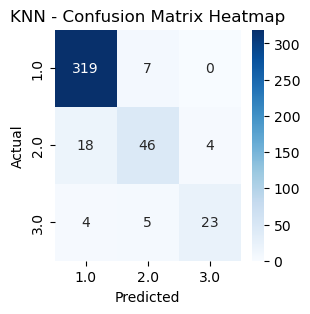


--- Gaussian Naive Bayes ---
Accuracy: 0.8028169014084507
Classification Report:
              precision    recall  f1-score   support

         1.0       0.98      0.81      0.89       326
         2.0       0.46      0.90      0.61        68
         3.0       0.71      0.53      0.61        32

    accuracy                           0.80       426
   macro avg       0.72      0.75      0.70       426
weighted avg       0.88      0.80      0.82       426



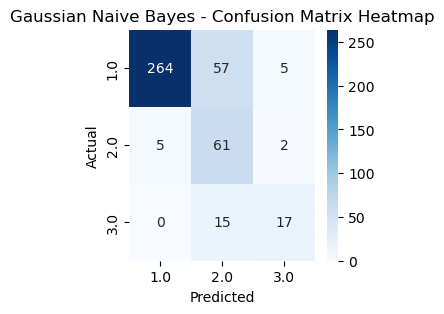


--- Random Forest ---
Accuracy: 0.9413145539906104
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       326
         2.0       0.89      0.74      0.81        68
         3.0       0.85      0.88      0.86        32

    accuracy                           0.94       426
   macro avg       0.90      0.87      0.88       426
weighted avg       0.94      0.94      0.94       426



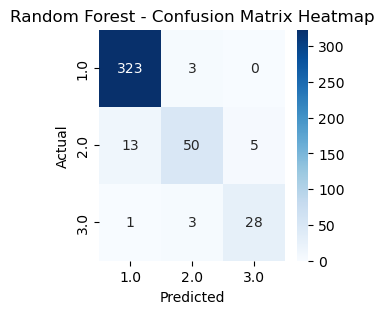


--- Gradient Boosting ---
Accuracy: 0.9389671361502347
Classification Report:
              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       326
         2.0       0.88      0.76      0.82        68
         3.0       0.88      0.88      0.88        32

    accuracy                           0.94       426
   macro avg       0.90      0.87      0.89       426
weighted avg       0.94      0.94      0.94       426



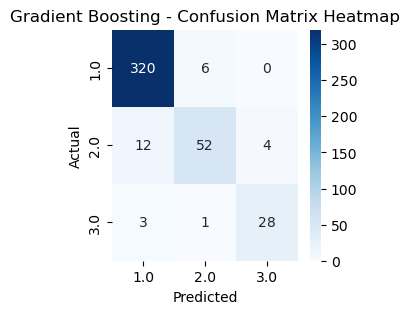


--- Logistic Regression ---
Accuracy: 0.8262910798122066
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.87      0.91       326
         2.0       0.51      0.66      0.58        68
         3.0       0.54      0.78      0.64        32

    accuracy                           0.83       426
   macro avg       0.67      0.77      0.71       426
weighted avg       0.86      0.83      0.84       426



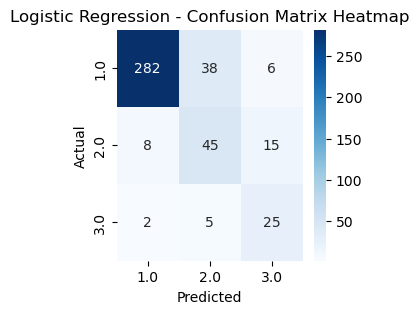


--- Linear Discriminant Analysis ---
Accuracy: 0.8591549295774648
Classification Report:
              precision    recall  f1-score   support

         1.0       0.98      0.87      0.92       326
         2.0       0.58      0.90      0.71        68
         3.0       0.70      0.72      0.71        32

    accuracy                           0.86       426
   macro avg       0.75      0.83      0.78       426
weighted avg       0.89      0.86      0.87       426



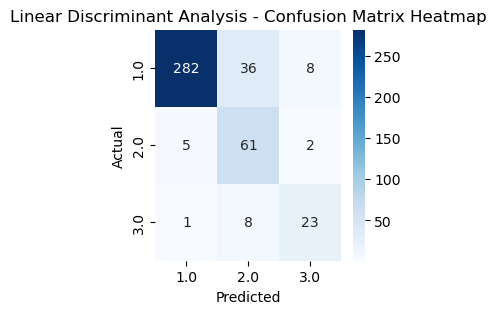


--- Linear Discriminant Analysis (w/o outliers) ---
Accuracy: 0.5821596244131455
Classification Report:
              precision    recall  f1-score   support

         1.0       0.93      0.58      0.71       326
         2.0       0.25      0.68      0.37        68
         3.0       0.33      0.41      0.37        32

    accuracy                           0.58       426
   macro avg       0.50      0.55      0.48       426
weighted avg       0.77      0.58      0.63       426



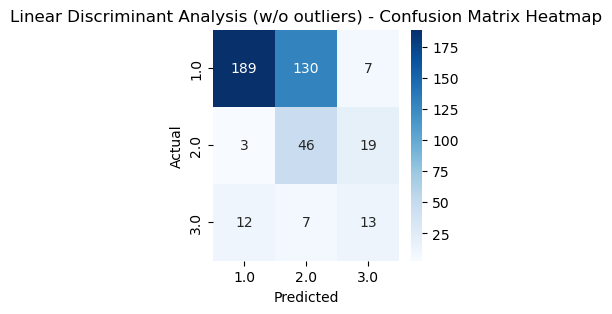


--- Support Vector Machine ---
Accuracy: 0.8568075117370892
Classification Report:
              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       326
         2.0       0.67      0.46      0.54        68
         3.0       0.60      0.75      0.67        32

    accuracy                           0.86       426
   macro avg       0.73      0.72      0.71       426
weighted avg       0.85      0.86      0.85       426



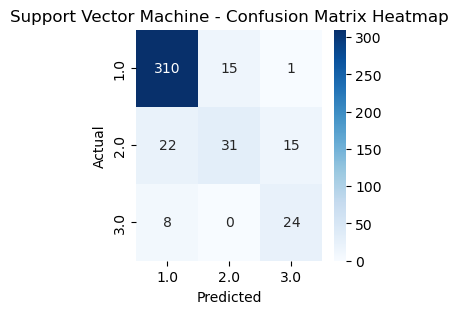


--- Neural Network ---
Accuracy: 0.9225352112676056
Classification Report:
              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       326
         2.0       0.77      0.81      0.79        68
         3.0       0.82      0.84      0.83        32

    accuracy                           0.92       426
   macro avg       0.85      0.87      0.86       426
weighted avg       0.92      0.92      0.92       426



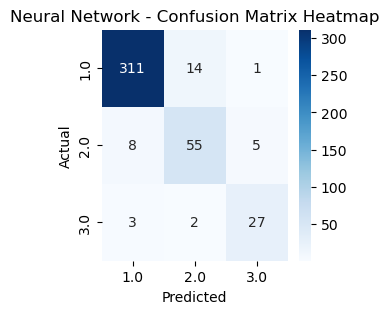

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize


# Function to predict and evaluate the model
def predict_and_evaluate(model, X_val, y_val, title):
    # Print the model title
    print(f"\n--- {title} ---")

    # Predict on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f'Accuracy: {accuracy}')

    # Generate classification report
    class_report = classification_report(y_val, y_val_pred)
    print('Classification Report:')
    print(class_report)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y_val), columns=np.unique(y_val))

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(3, 3))
    sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{title} - Confusion Matrix Heatmap')
    plt.show()

    # Calculate weighted recall, precision, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')

    # Return the true labels and predicted scores for all classes, along with the metrics
    y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
    y_val_scores = model.predict_proba(X_val) if hasattr(model, "predict_proba") else model.decision_function(X_val)
    return y_val_bin, y_val_scores, accuracy, precision, recall, f1

models = {
    'KNN': best_knn,
    'Gaussian Naive Bayes': best_gnb,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'Logistic Regression': best_log_reg,
    'Linear Discriminant Analysis': best_lda,
    'Linear Discriminant Analysis (w/o outliers)': best_lda2,
    'Support Vector Machine': best_svc,
    'Neural Network': best_model_nn
}

# Store metrics results
metrics_results = {}
roc_results = {}

best_auc = 0
best_model_name = None

for model_name, model in models.items():
    y_val_bin, y_val_scores, accuracy, precision, recall, f1 = predict_and_evaluate(model, X_val_scaled, y_val, model_name)

    # Calculate weighted AUC
    weighted_auc = roc_auc_score(y_val_bin, y_val_scores, average='weighted', multi_class='ovr')

    # Store metrics results
    metrics_results[model_name] = {
        'Accuracy': accuracy,
        'Weighted Precision': precision,
        'Weighted Recall': recall,
        'Weighted F1-Score': f1,
        'Weighted AUC': weighted_auc
    }

    # Store ROC results
    fpr, tpr, _ = roc_curve(y_val_bin.ravel(), y_val_scores.ravel())
    roc_results[model_name] = (fpr, tpr, weighted_auc)

    if weighted_auc > best_auc:
        best_auc = weighted_auc
        best_model_name = model_name




4. Summary of metrics across models

In [ ]:
cv_accuracies = {
    'KNN': best_knn_cv_accuracy,
    'Gaussian Naive Bayes': best_gnb_cv_accuracy,
    'Random Forest': best_rf_cv_accuracy,
    'Gradient Boosting': best_gb_cv_accuracy,
    'Logistic Regression': best_log_reg_cv_accuracy,
    'Linear Discriminant Analysis': best_lda_cv_accuracy,
    'Linear Discriminant Analysis (w/o outliers)': best_lda_cv_accuracy2,
    'Support Vector Machine': best_svc_cv_accuracy,
    'Neural Network': best_model_nn_cv_accuracy
}

# Create a dataframe of metrics
metrics_df = pd.DataFrame(metrics_results).T

# Add the best cross-validation accuracy to the dataframe
metrics_df['Best Cross-Validation Accuracy'] = metrics_df.index.map(cv_accuracies)


# Reorder the columns
metrics_df = metrics_df[['Accuracy', 'Best Cross-Validation Accuracy',
                         'Weighted Precision', 'Weighted Recall',
                         'Weighted F1-Score', 'Weighted AUC']]

# Sort the models based on validation accuracy
metrics_df_sorted = metrics_df.sort_values(by='Accuracy', ascending=False)

print("\nModel Metrics Sorted by Accuracy:")
metrics_df_sorted


Model Metrics Sorted by Accuracy:


Accuracy  \
Random Forest                                0.941315   
Gradient Boosting                            0.938967   
Neural Network                               0.922535   
KNN                                          0.910798   
Linear Discriminant Analysis                 0.859155   
Support Vector Machine                       0.856808   
Logistic Regression                          0.826291   
Gaussian Naive Bayes                         0.802817   
Linear Discriminant Analysis (w/o outliers)  0.582160   

                                             Best Cross-Validation Accuracy  \
Random Forest                                                      0.982699   
Gradient Boosting                                                  0.975175   
Neural Network                                                     0.968145   
KNN                                                                0.980187   
Linear Discriminant Analysis                                       0.827695   
Support Vector Machine                                             0.982945   
Logistic Regression                                                0.885378   
Gaussian Naive Bayes                                               0.773781   
Linear Discriminant Analysis (w/o outliers)                        0.863317   

                                             Weighted Precision  \
Random Forest                                          0.939725   
Gradient Boosting                                      0.937407   
Neural Network                                         0.924228   
KNN                                                    0.906474   
Linear Discriminant Analysis                           0.894404   
Support Vector Machine                                 0.850379   
Logistic Regression                                    0.861502   
Gaussian Naive Bayes                                   0.877453   
Linear Discriminant Analysis (w/o outliers)            0.774153   

                                             Weighted Recall  \
Random Forest                                       0.941315   
Gradient Boosting                                   0.938967   
Neural Network                                      0.922535   
KNN                                                 0.910798   
Linear Discriminant Analysis                        0.859155   
Support Vector Machine                              0.856808   
Logistic Regression                                 0.826291   
Gaussian Naive Bayes                                0.802817   
Linear Discriminant Analysis (w/o outliers)         0.582160   

                                             Weighted F1-Score  Weighted AUC  
Random Forest                                         0.939082      0.980526  
Gradient Boosting                                     0.937390      0.988255  
Neural Network                                        0.923280      0.977528  
KNN                                                   0.907103      0.944910  
Linear Discriminant Analysis                          0.868668      0.957914  
Support Vector Machine                                0.849294      0.931397  
Logistic Regression                                   0.838634      0.950112  
Gaussian Naive Bayes                                  0.821580      0.948808  
Linear Discriminant Analysis (w/o outliers)           0.631803      0.827278

5. ROC curve for all models

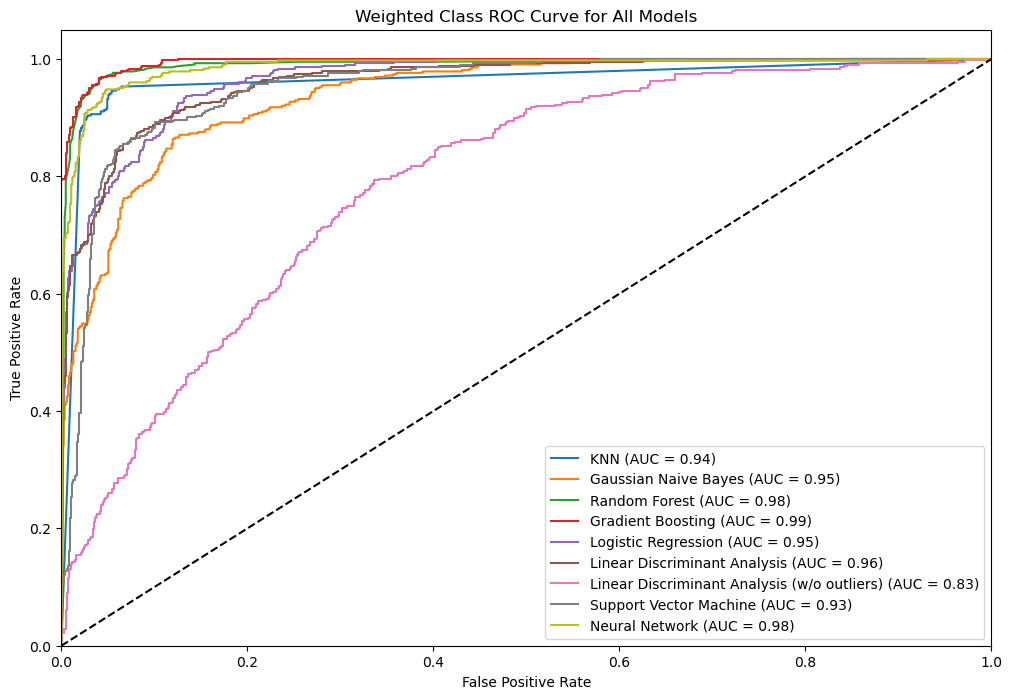

In [ ]:
# Plot all ROC curves in one plot for each model
plt.figure(figsize=(12, 8))

for model_name, (fpr, tpr, weighted_auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {weighted_auc:.2f})')

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Weighted Class ROC Curve for All Models')
plt.legend(loc="lower right")
plt.show()

Gradient Boosting seems to have best performace across models for validataion data.

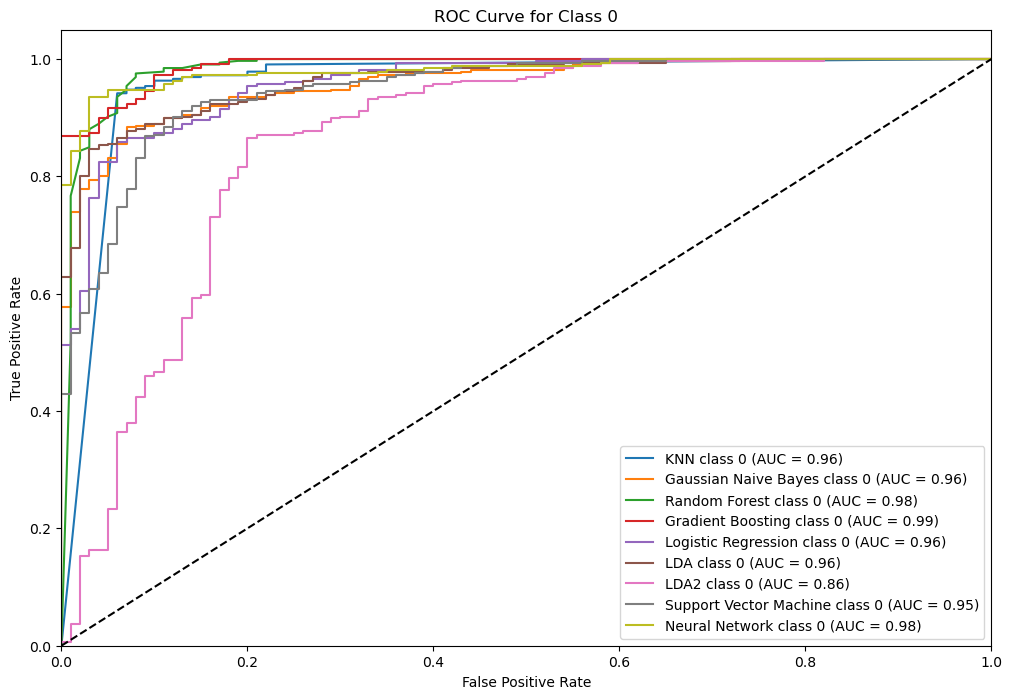

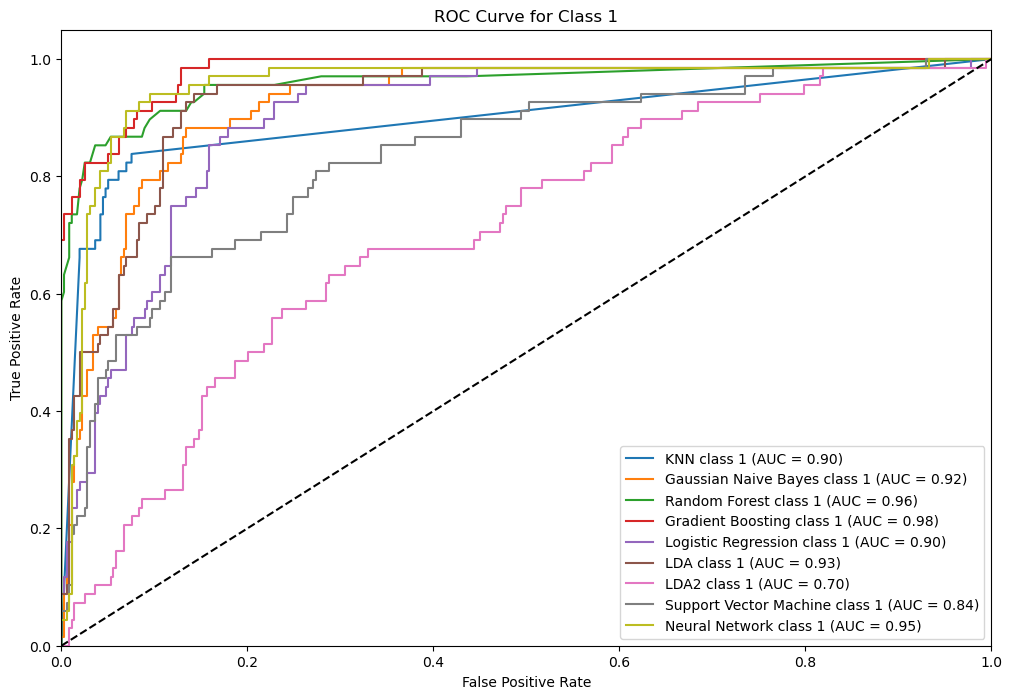

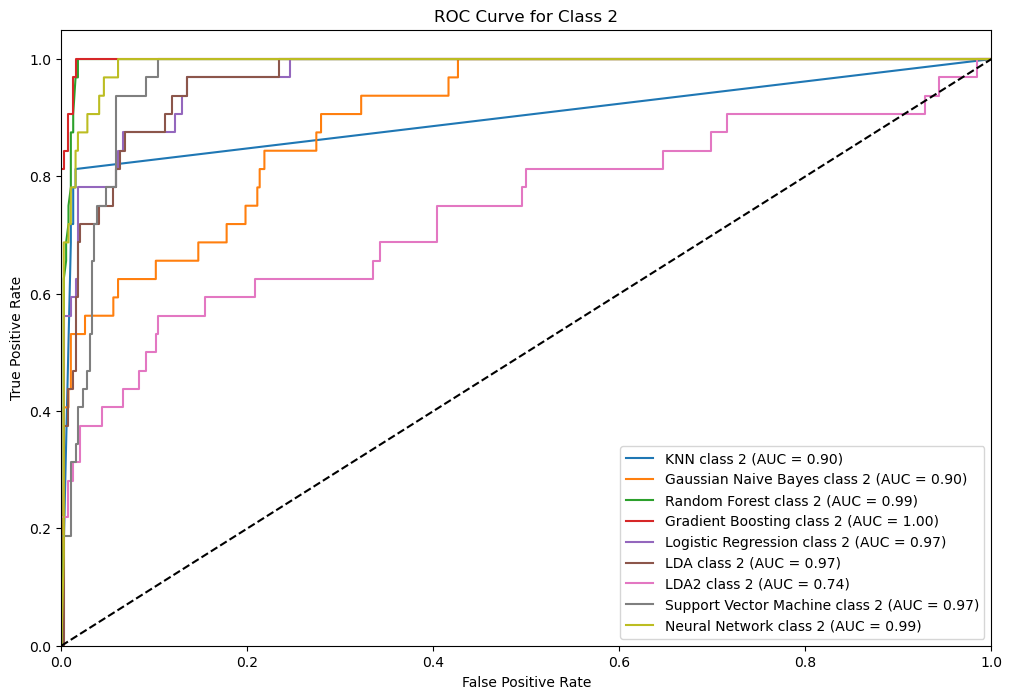

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Function to predict and evaluate the model
def predict_and_evaluate(model, X_val, y_val, title):

    # Predict on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    # Generate classification report
    class_report = classification_report(y_val, y_val_pred)


    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y_val), columns=np.unique(y_val))
    # Calculate weighted recall, precision, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')

    # Return the true labels and predicted scores for all classes, along with the metrics
    y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
    y_val_scores = model.predict_proba(X_val) if hasattr(model, "predict_proba") else model.decision_function(X_val)
    return y_val_bin, y_val_scores, accuracy, precision, recall, f1

models = {
    'KNN': best_knn,
    'Gaussian Naive Bayes': best_gnb,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'Logistic Regression': best_log_reg,
    'LDA': best_lda,
    'LDA2': best_lda2,
    'Support Vector Machine': best_svc,
    'Neural Network': best_model_nn
}

# Store ROC curve results for all classes and metrics
roc_results = {}
metrics_results = {}

best_auc = 0
best_model_name = None
best_class = None

for model_name, model in models.items():
    y_val_bin, y_val_scores, accuracy, precision, recall, f1 = predict_and_evaluate(model, X_val_scaled, y_val, model_name)

    # Store metrics results
    metrics_results[model_name] = {
        'Accuracy': accuracy,
        'Weighted Precision': precision,
        'Weighted Recall': recall,
        'Weighted F1-Score': f1,
        'Weighted AUC': None  # Placeholder for the AUC
    }

    # Store results for each class
    for i in range(y_val_bin.shape[1]):
        fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_val_scores[:, i])
        roc_auc = roc_auc_score(y_val_bin[:, i], y_val_scores[:, i])

        # Store the results
        roc_results[(model_name, i)] = (fpr, tpr, roc_auc)

        if roc_auc > best_auc:
            best_auc = roc_auc
            best_model_name = model_name
            best_class = i
# Plot all ROC curves in one plot for each class
plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

for (model_name, i), (fpr, tpr, roc_auc) in roc_results.items():
    if i ==0:
      plt.plot(fpr, tpr, label=f'{model_name} class {i} (AUC = {roc_auc:.2f})')

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 0')
plt.legend(loc="lower right")
plt.show()



# Plot all ROC curves in one plot for each class
plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

for (model_name, i), (fpr, tpr, roc_auc) in roc_results.items():
    if i ==1:
      plt.plot(fpr, tpr, label=f'{model_name} class {i} (AUC = {roc_auc:.2f})')

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 1')
plt.legend(loc="lower right")
plt.show()


# Plot all ROC curves in one plot for each class
plt.figure(figsize=(12, 8))

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

for (model_name, i), (fpr, tpr, roc_auc) in roc_results.items():
    if i ==2:
      plt.plot(fpr, tpr, label=f'{model_name} class {i} (AUC = {roc_auc:.2f})')

# Plot the ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 2')
plt.legend(loc="lower right")
plt.show()




6. Gains Chart

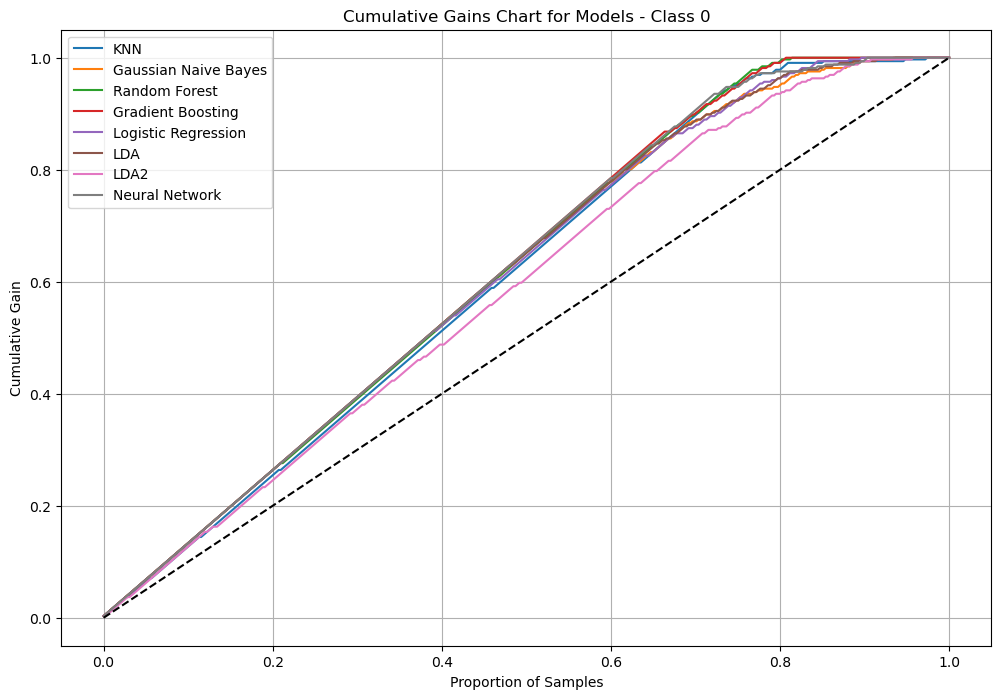

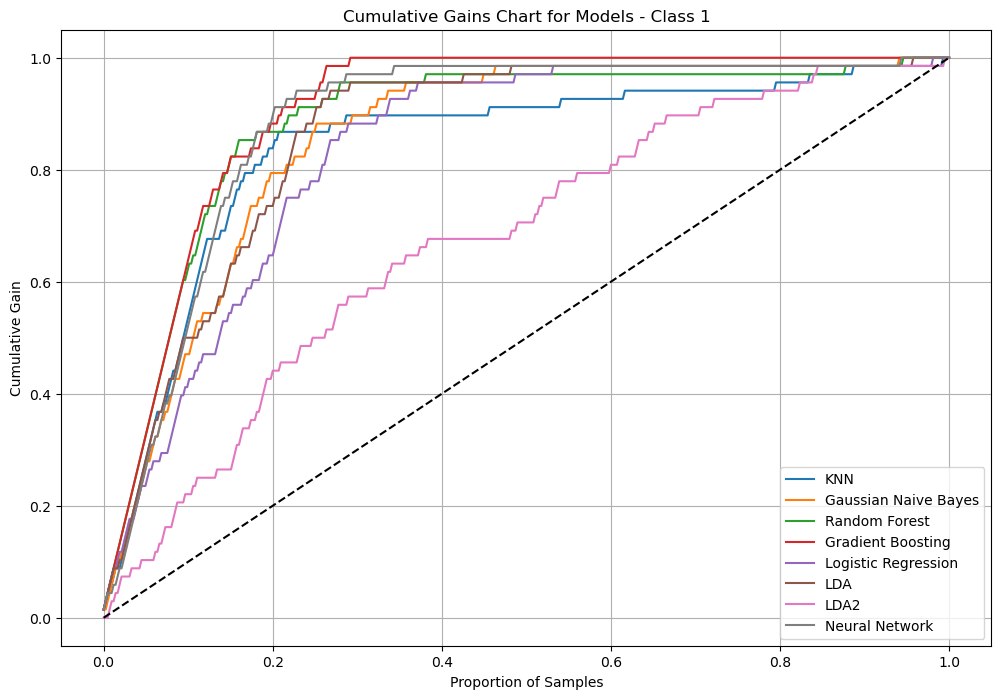

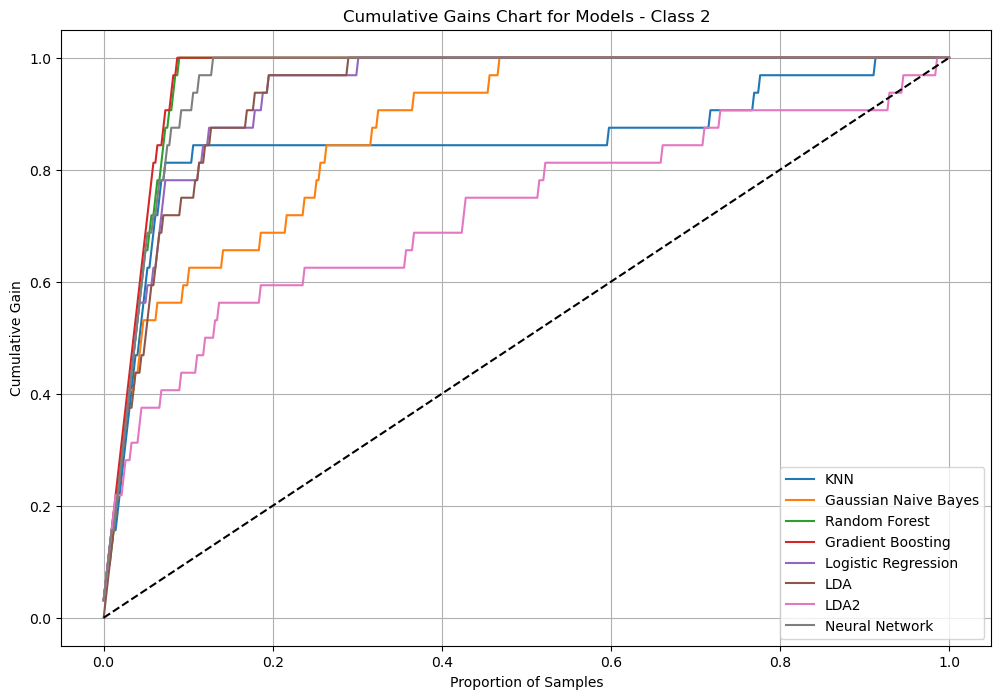

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Function to predict and evaluate the model
def predict_and_evaluate(model, X_val, y_val, title):
    # Predict on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    # Generate classification report
    class_report = classification_report(y_val, y_val_pred)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y_val), columns=np.unique(y_val))

    # Calculate weighted recall, precision, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')

    # Return the true labels and predicted scores for all classes, along with the metrics
    y_val_bin = label_binarize(y_val, classes=np.unique(y_val))
    y_val_scores = model.predict_proba(X_val) if hasattr(model, "predict_proba") else None
    return y_val, y_val_scores, accuracy, precision, recall, f1


# Function to plot cumulative gains chart
def plot_cumulative_gains_chart(y_true, y_probas_dict, class_idx, title):
    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
    cumulative_gains_data = {}

    for model_name, y_probas in y_probas_dict.items():
        sorted_indices = np.argsort(y_probas[:, class_idx])[::-1]
        y_true_sorted = y_true_bin[sorted_indices, class_idx]
        cum_gains = np.cumsum(y_true_sorted) / np.sum(y_true_sorted)
        cumulative_gains_data[model_name] = cum_gains

    x = np.linspace(0, 1, len(next(iter(cumulative_gains_data.values()))))
    plt.figure(figsize=(12, 8))
    for model_name, gains in cumulative_gains_data.items():
        plt.plot(x, gains, label=model_name)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('Proportion of Samples')
    plt.ylabel('Cumulative Gain')
    plt.title(f'{title} - Class {class_idx}')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

models = {
    'KNN': best_knn,
    'Gaussian Naive Bayes': best_gnb,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'Logistic Regression': best_log_reg,
    'LDA': best_lda,
    'LDA2': best_lda2,
    'Support Vector Machine': best_svc,
    'Neural Network': best_model_nn
}

# Store metrics results and lift chart data
metrics_results = {}
lift_chart_results = {}
gains_chart_results = {}

for model_name, model in models.items():
    y_val, y_val_scores, accuracy, precision, recall, f1 = predict_and_evaluate(model, X_val_scaled, y_val, model_name)

    # Store metrics results
    metrics_results[model_name] = {
        'Accuracy': accuracy,
        'Weighted Precision': precision,
        'Weighted Recall': recall,
        'Weighted F1-Score': f1,
    }

    # Store lift chart and gains chart results for models with predict_proba
    if y_val_scores is not None:
        lift_chart_results[model_name] = (y_val, y_val_scores)
        for class_idx in range(y_val_scores.shape[1]):
            if class_idx not in gains_chart_results:
                gains_chart_results[class_idx] = {}
            gains_chart_results[class_idx][model_name] = y_val_scores

# Plot cumulative gains charts for models with predict_proba
for class_idx, y_probas_dict in gains_chart_results.items():
    plot_cumulative_gains_chart(y_val, y_probas_dict, class_idx, 'Cumulative Gains Chart for Models')



7. Decile-wise Lift chart

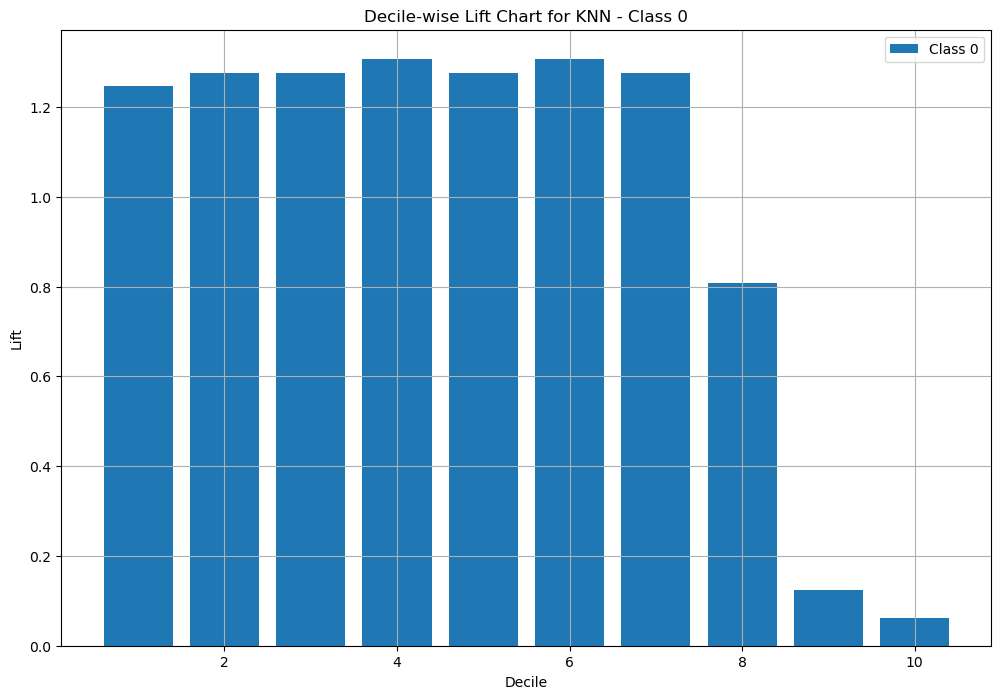

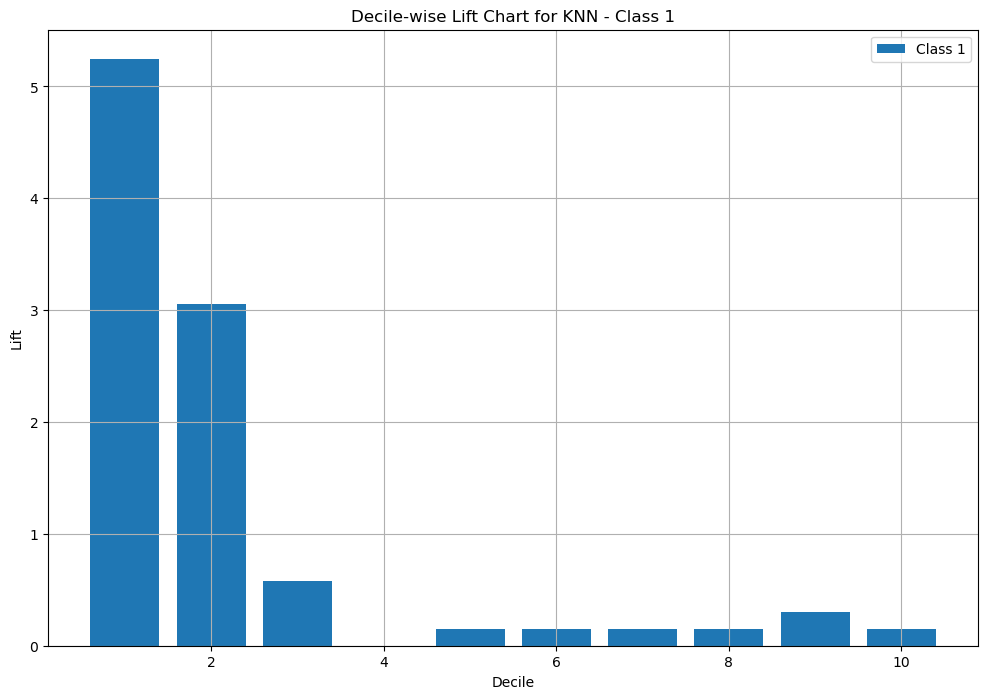

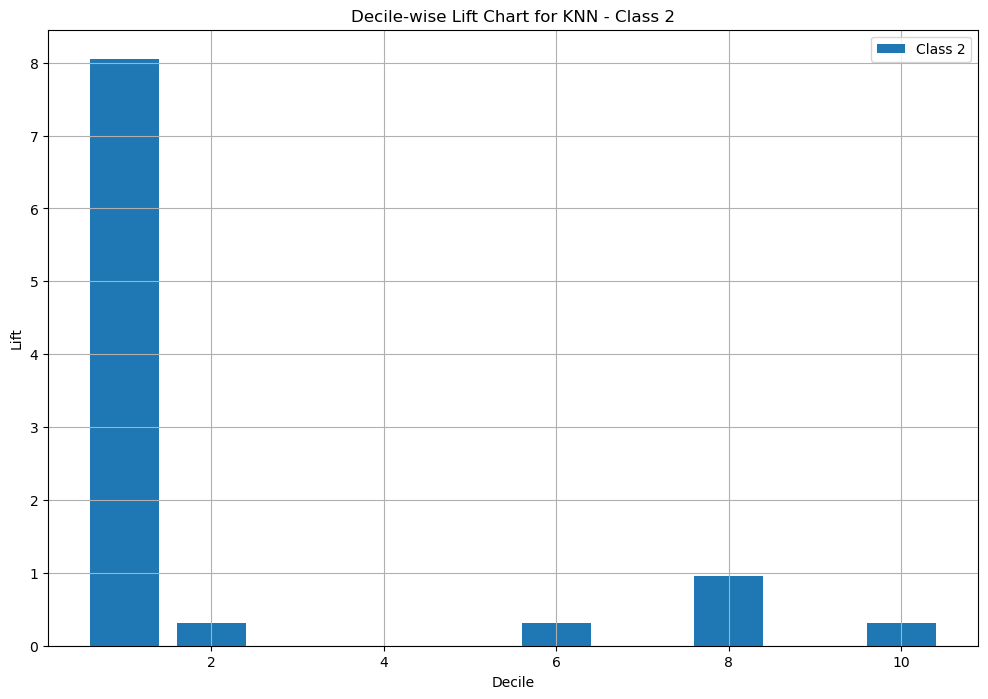

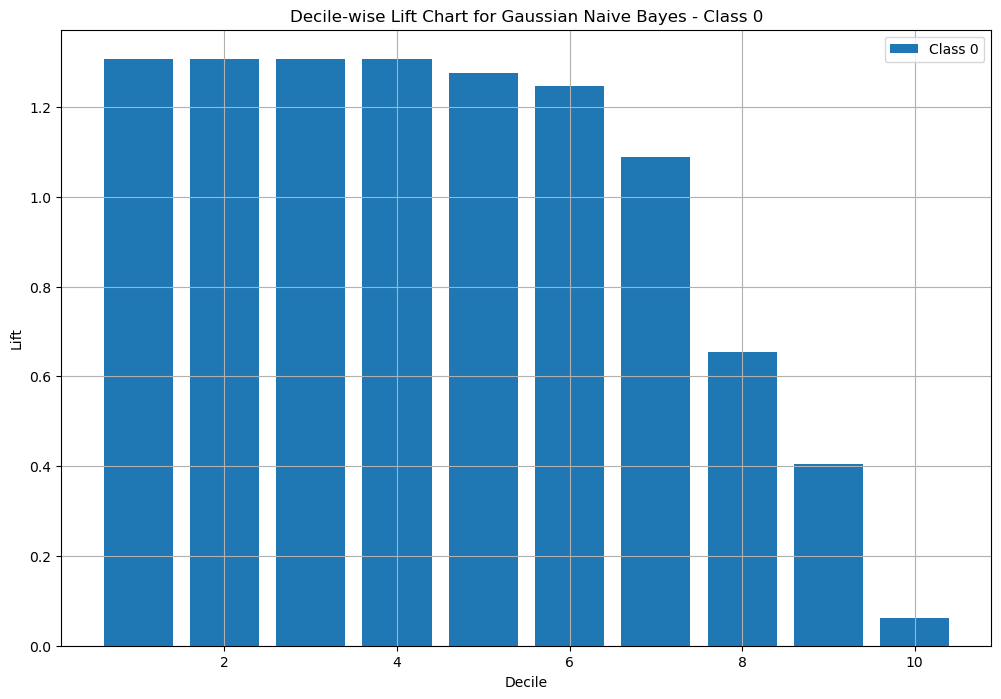

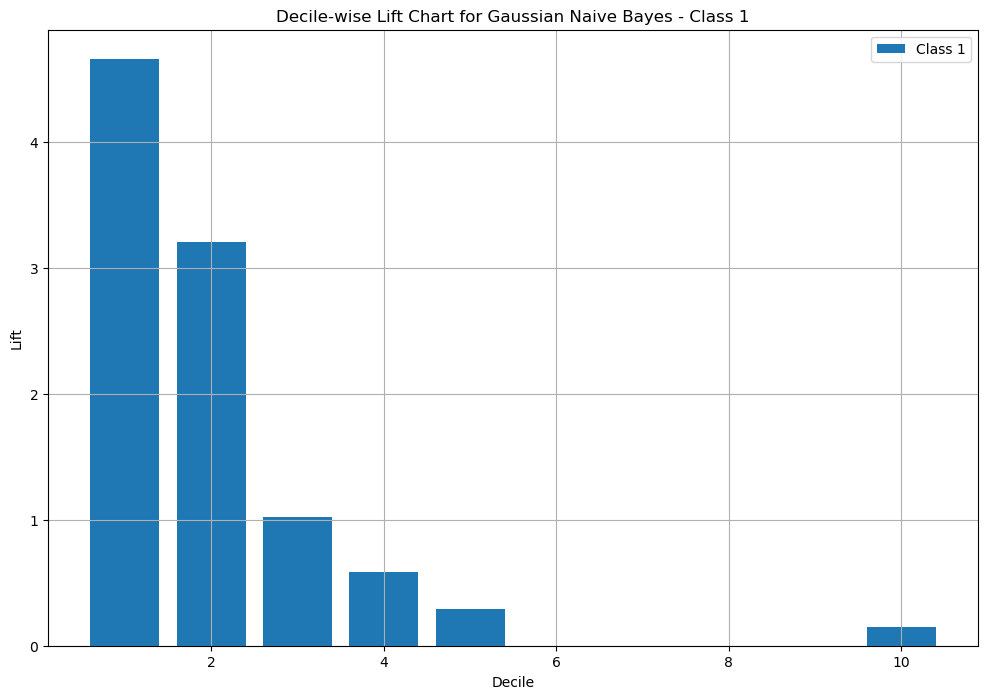

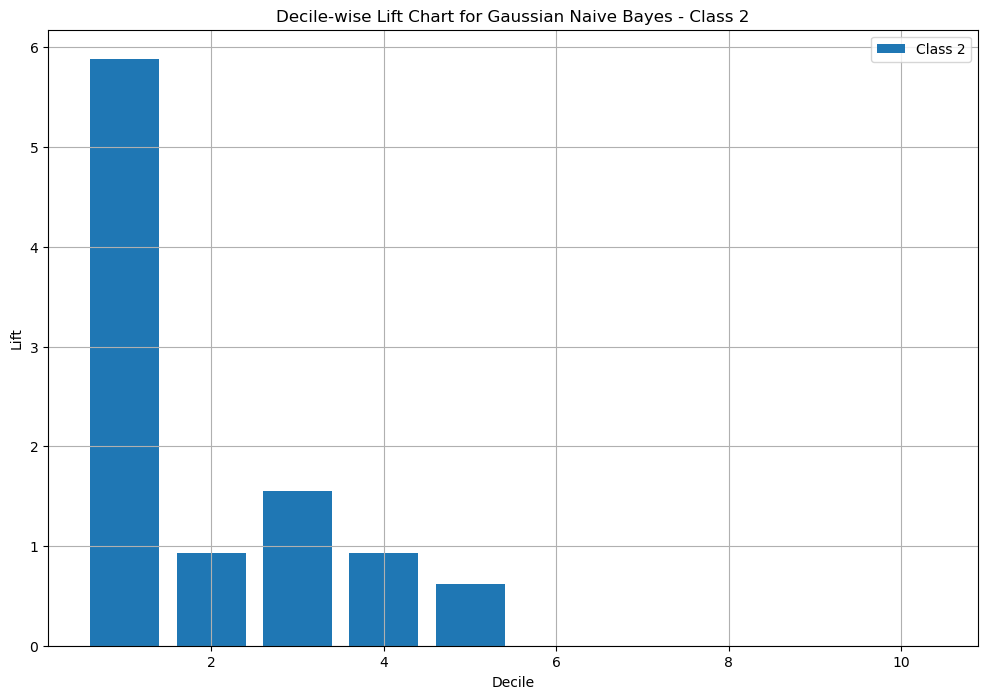

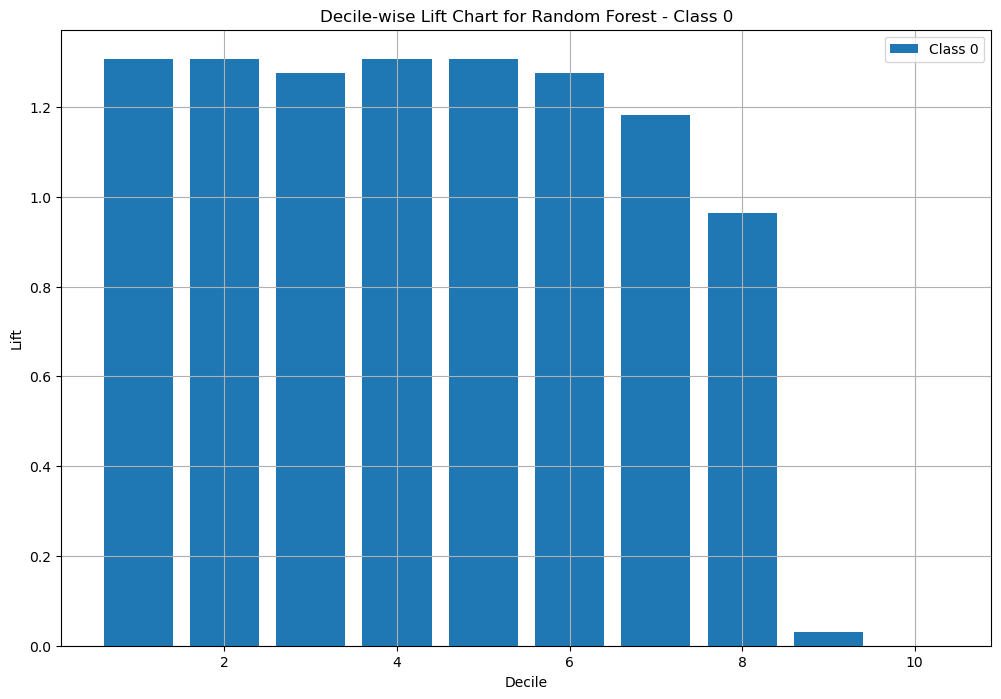

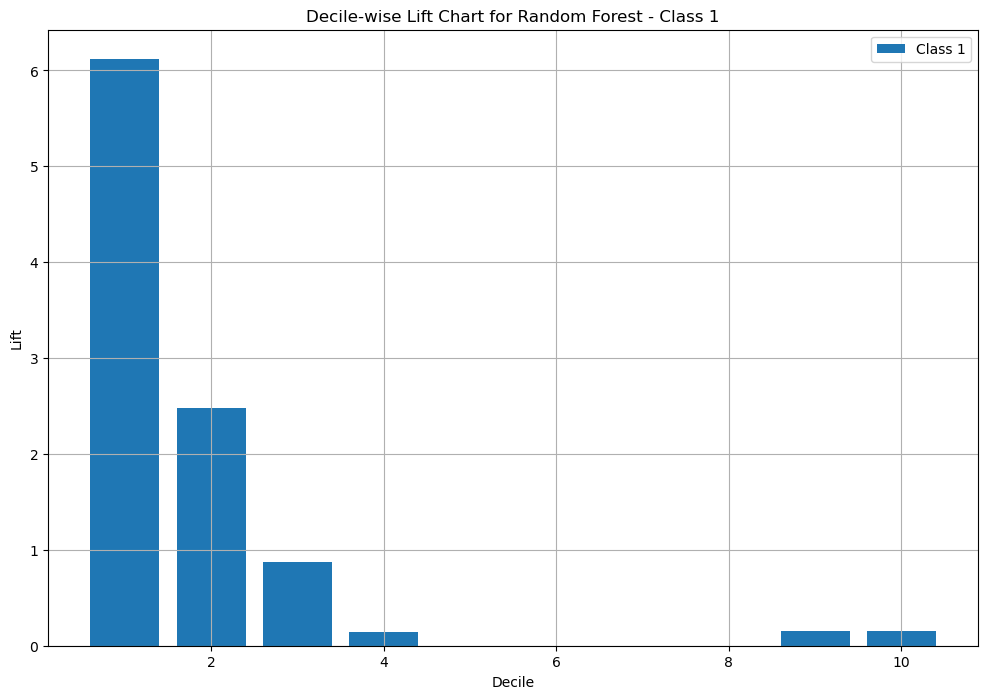

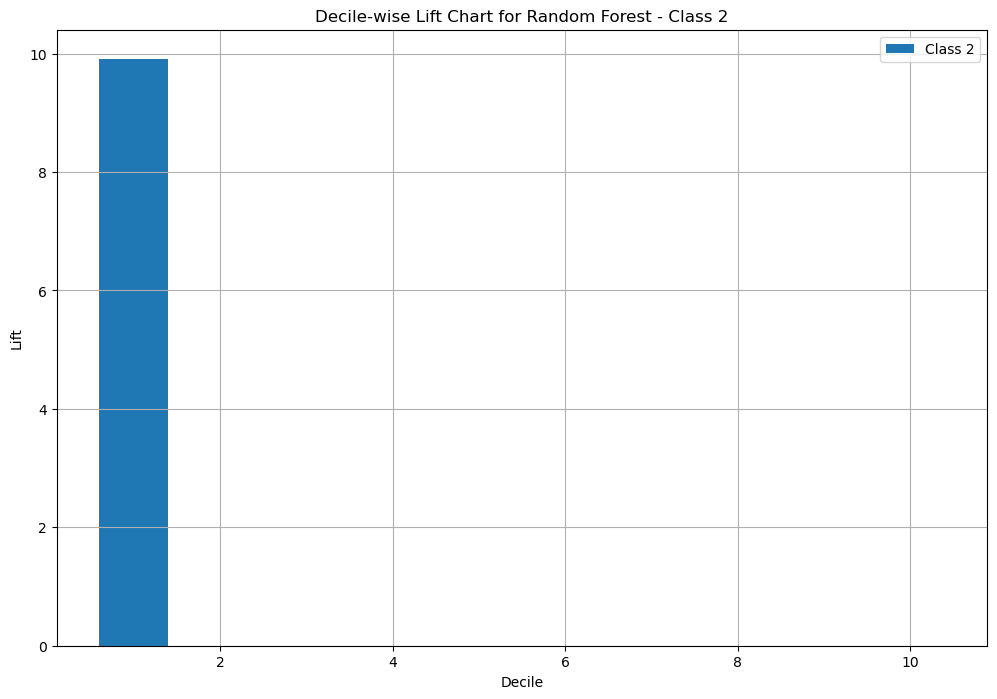

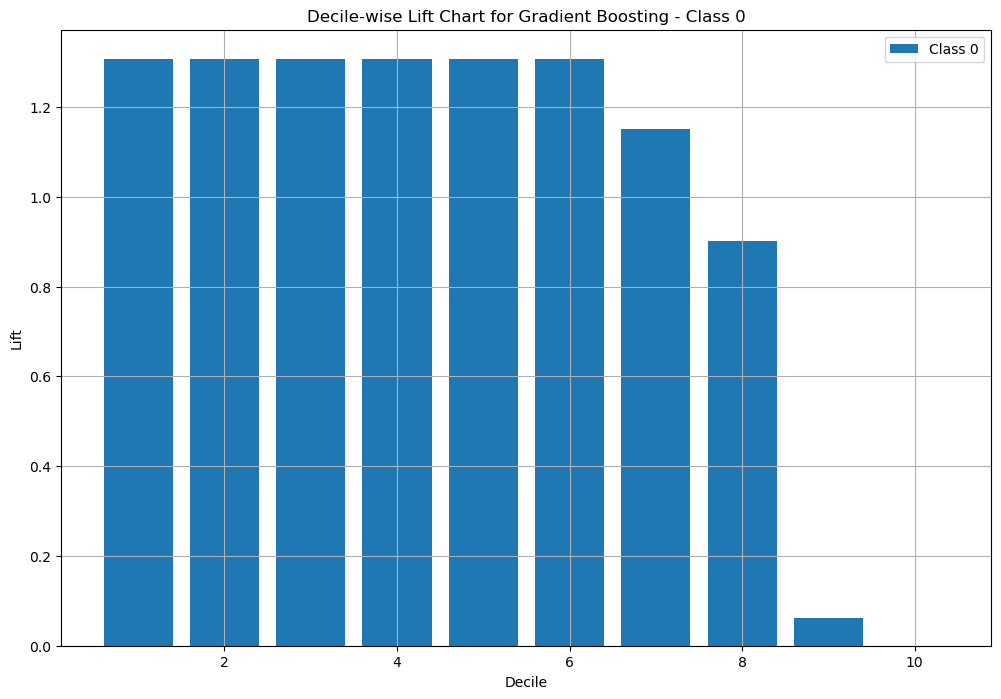

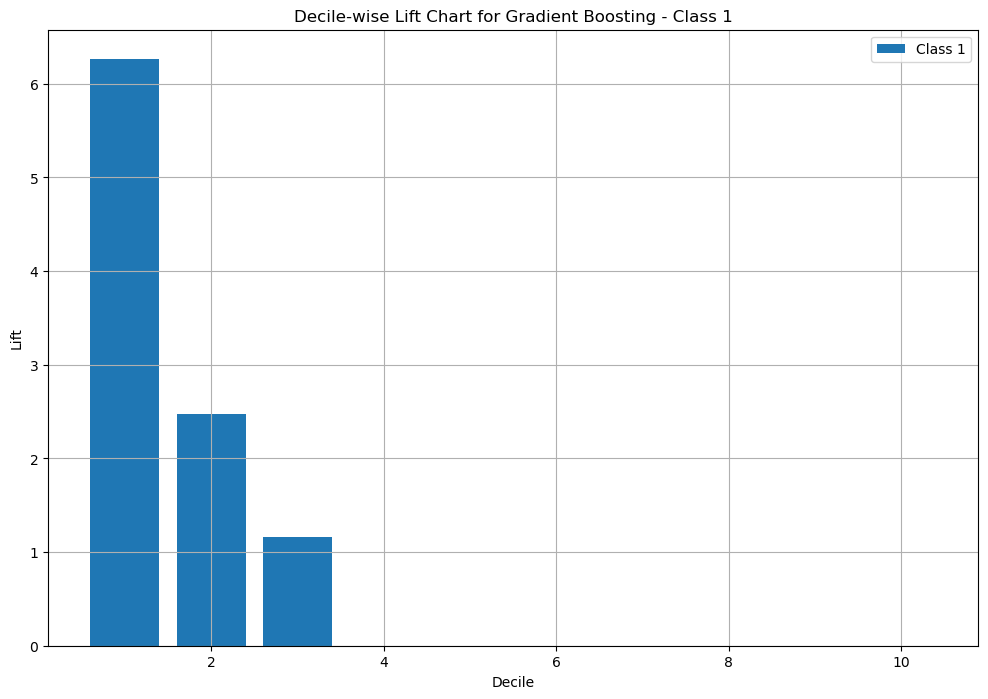

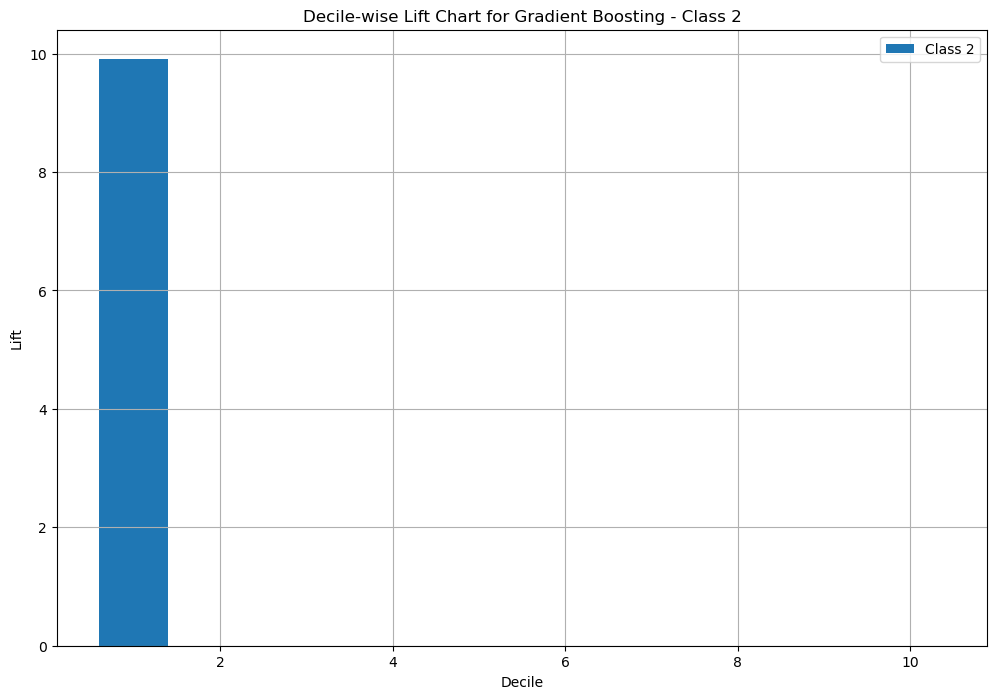

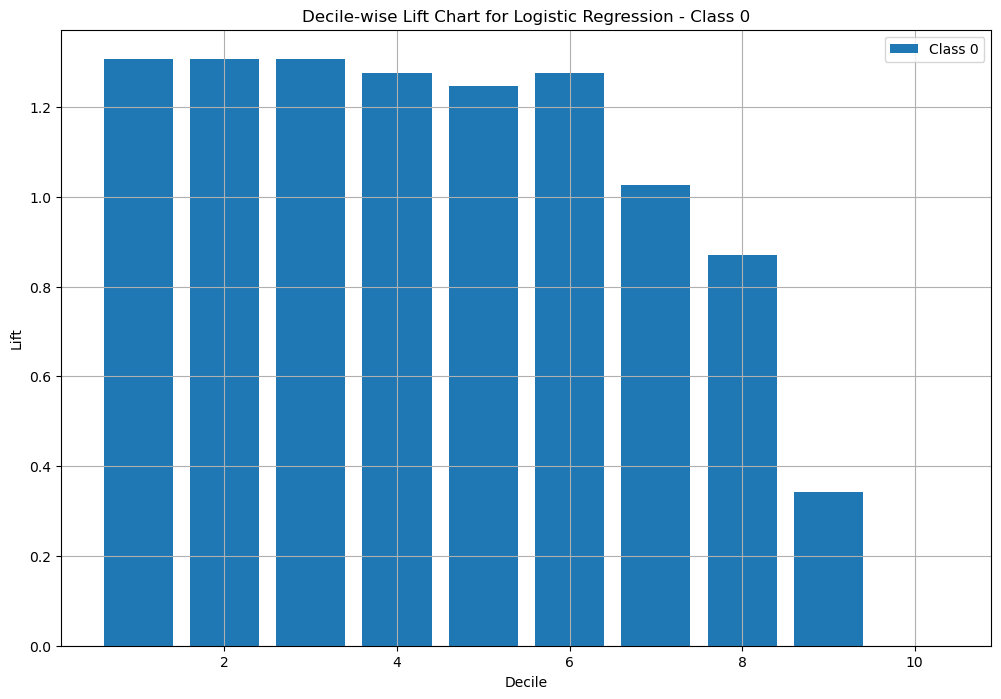

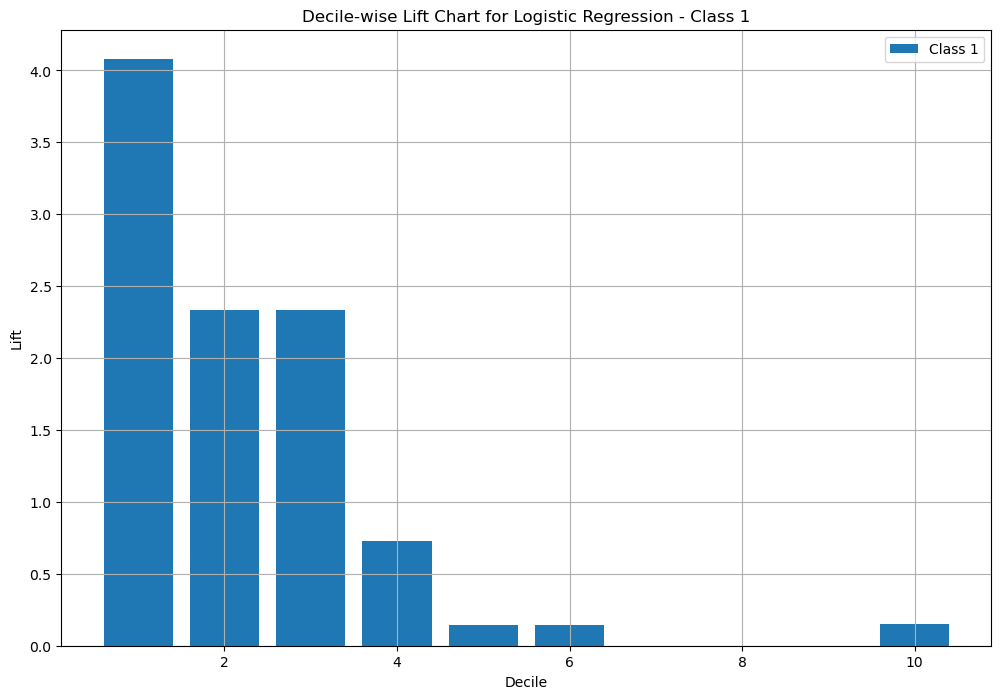

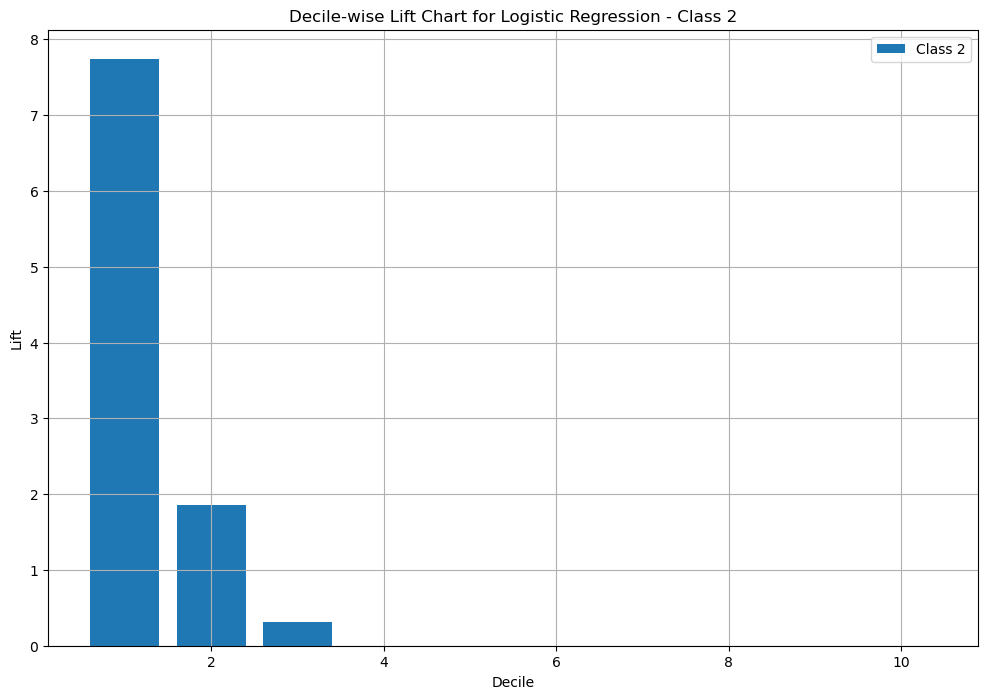

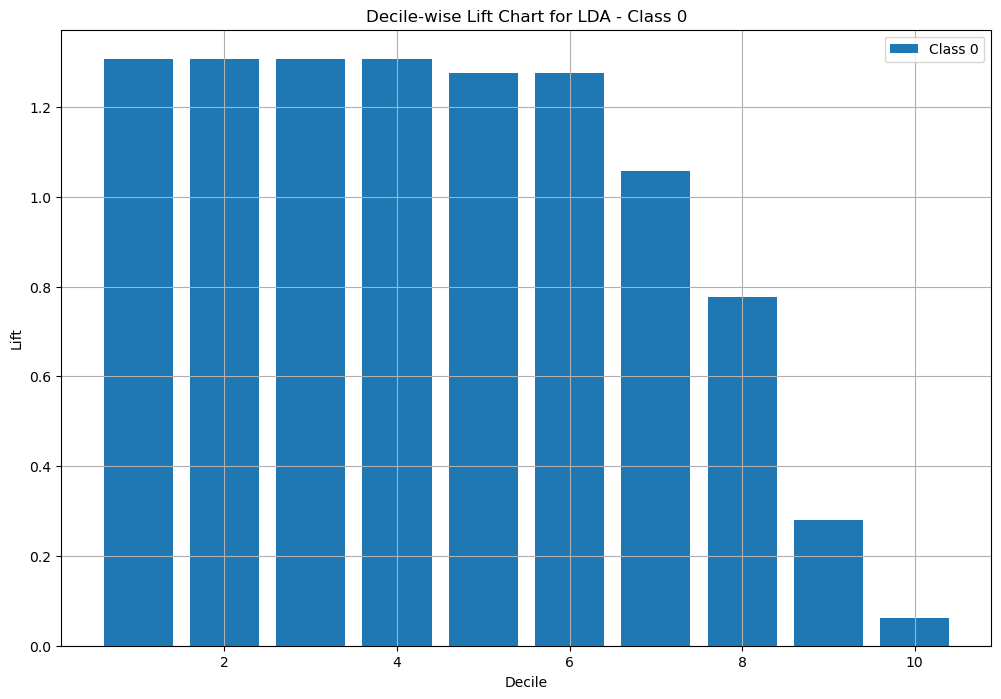

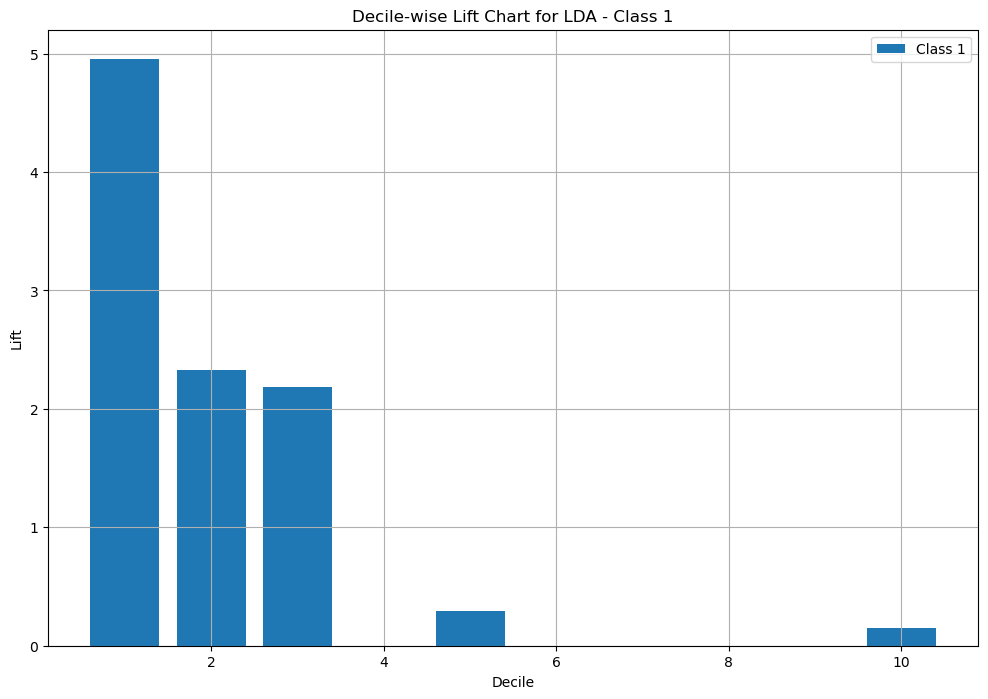

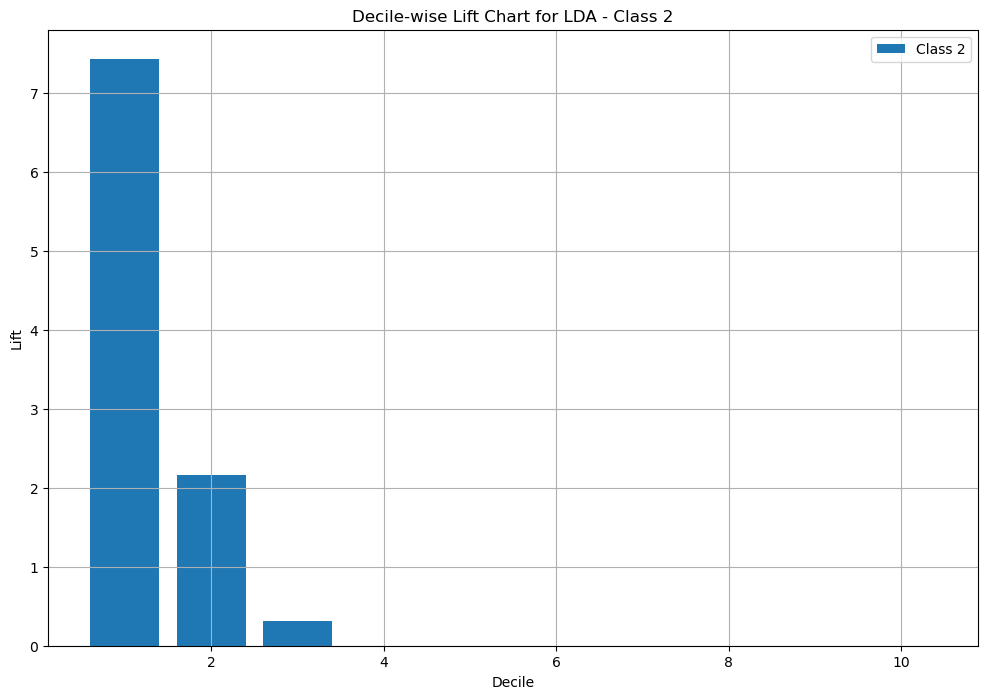

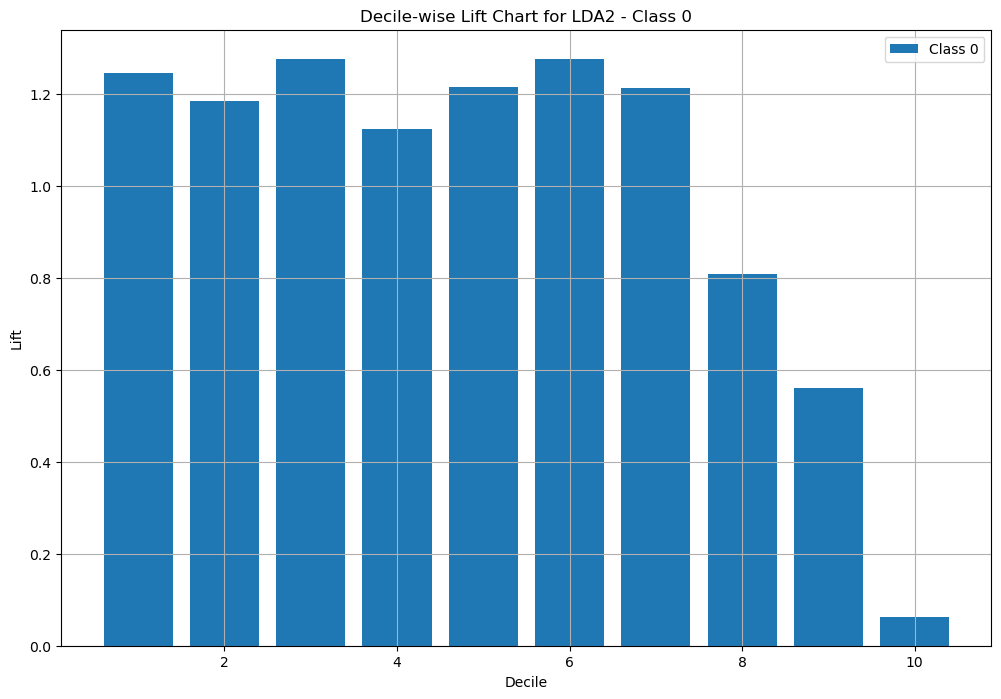

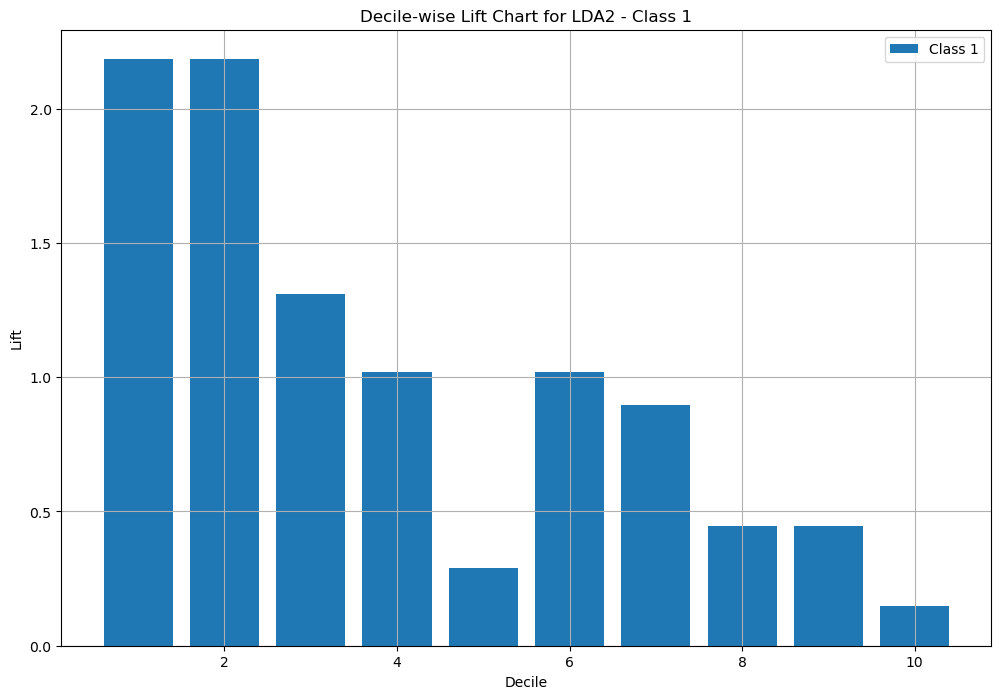

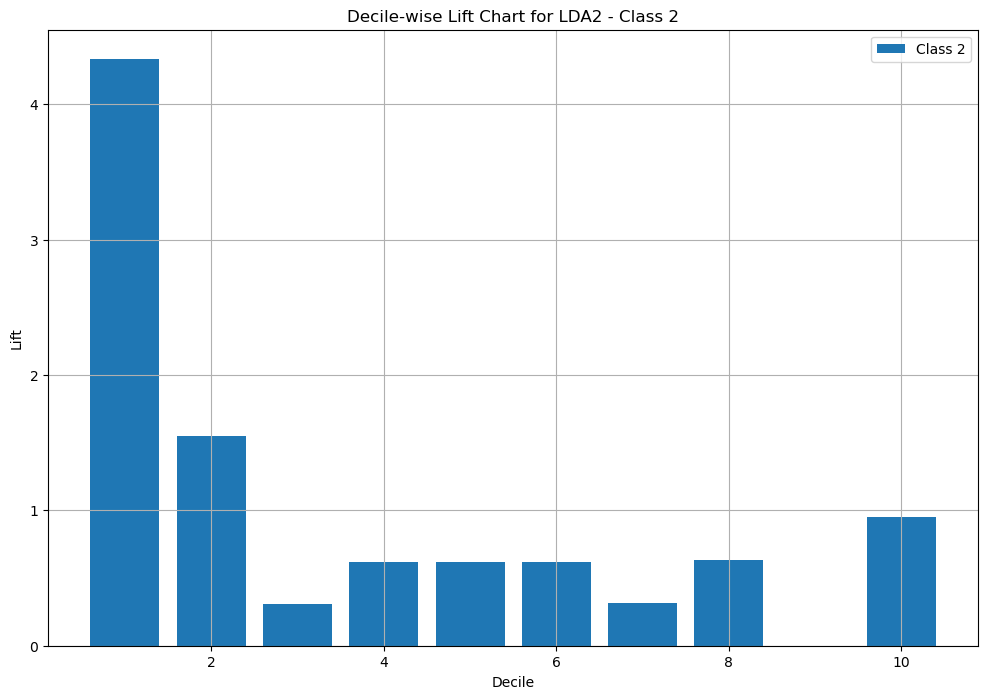

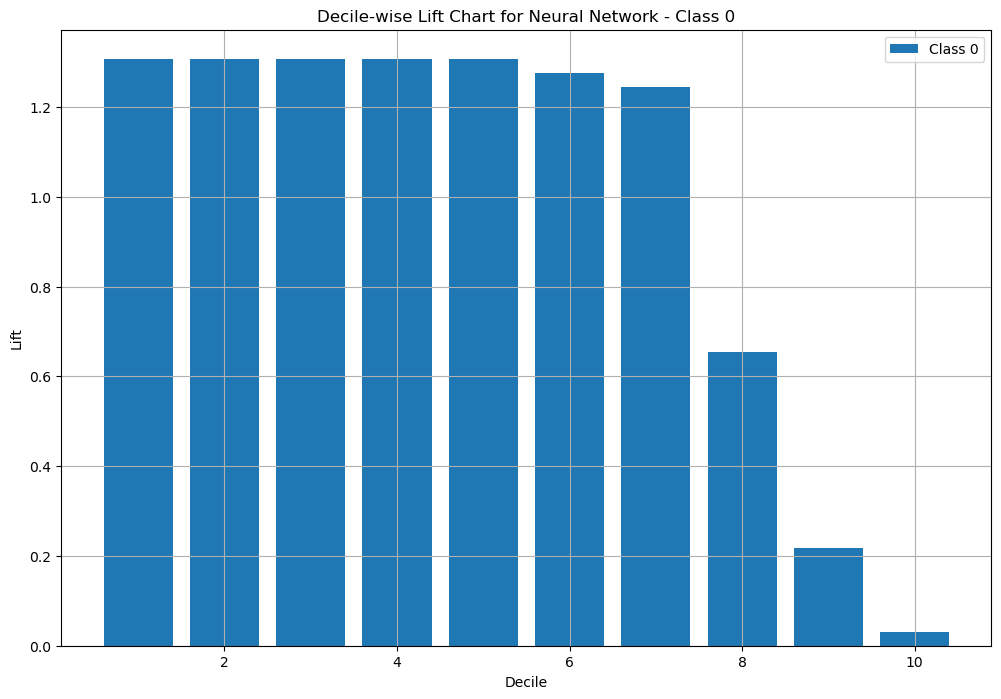

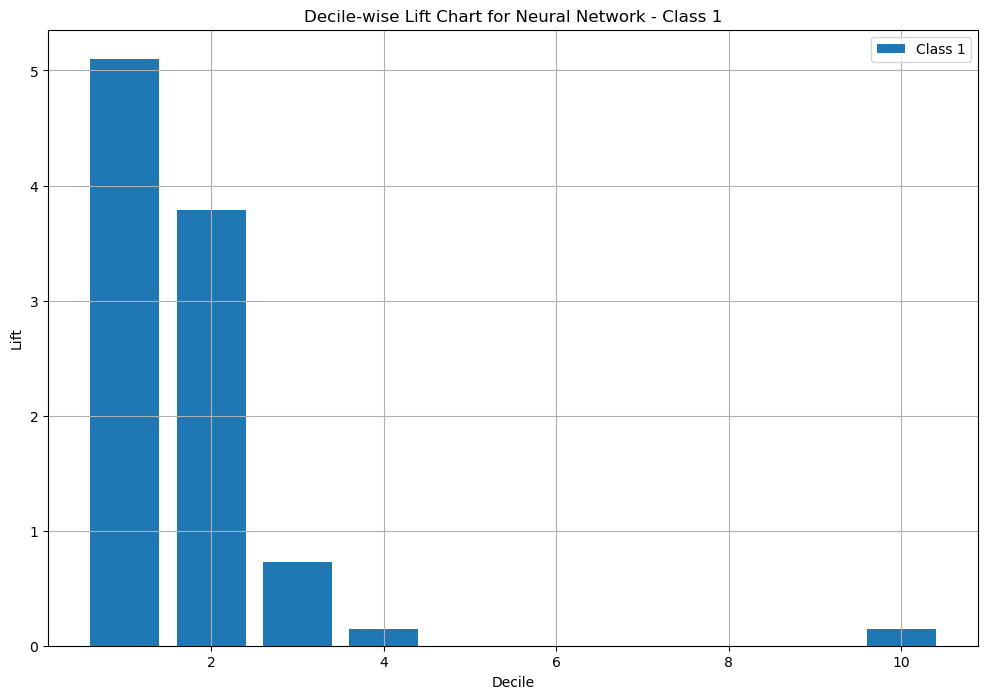

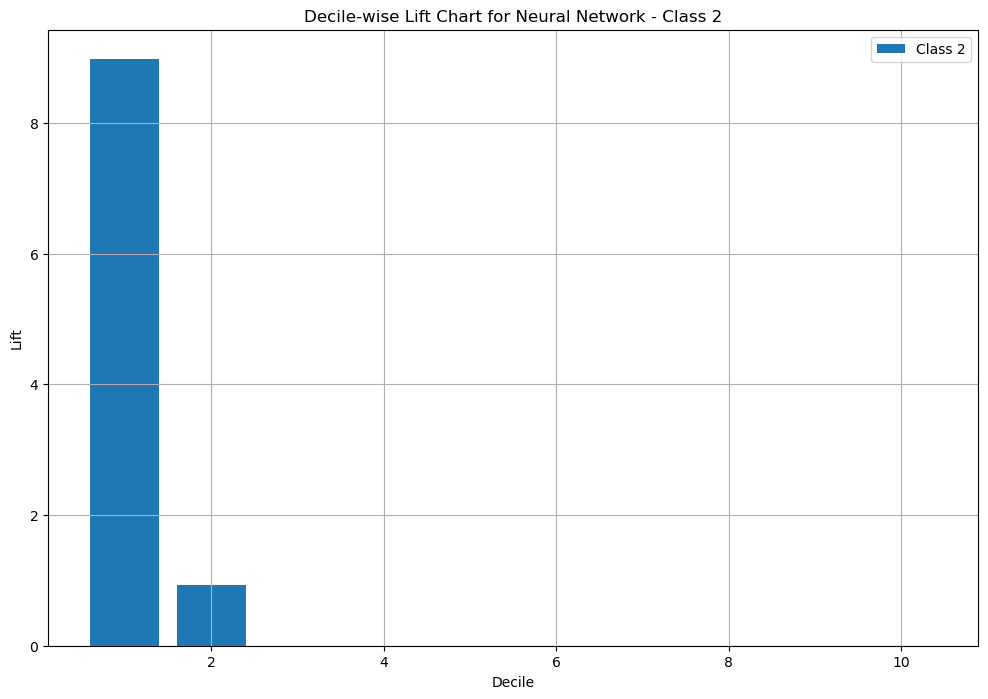

In [ ]:

# Function to plot decile-wise lift chart
def plot_decile_lift_chart(y_true, y_probas, title):
    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
    decile_lift_data = []

    for class_idx in range(y_true_bin.shape[1]):
        sorted_indices = np.argsort(y_probas[:, class_idx])[::-1]
        y_true_sorted = y_true_bin[sorted_indices, class_idx]
        total_positive = np.sum(y_true_sorted)
        deciles = np.array_split(y_true_sorted, 10)

        lift = []
        for decile in deciles:
            lift.append(np.sum(decile) / len(decile) / (total_positive / len(y_true_sorted)))

        decile_lift_data.append(lift)

    x = np.arange(1, 11)
    for i, lift in enumerate(decile_lift_data):
        plt.figure(figsize=(12, 8))
        plt.bar(x, lift, label=f'Class {i}')
        plt.xlabel('Decile')
        plt.ylabel('Lift')
        plt.title(f'{title} - Class {i}')
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()
# Plot lift charts for models with predict_proba
for model_name, (y_true, y_probas) in lift_chart_results.items():
    plot_decile_lift_chart(y_true, y_probas, f'Decile-wise Lift Chart for {model_name}')
